# HR Advisories Partnership with INSAIDIANS<br>
## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Check for Missing Data](#section3)<br>
4. [Impute the missing data](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
6. [Training the algorithm](#section6)<br>
7. [Testing the algorithm on the test dataset](#section7)<br>
8. [Executing the algorithm on the Unseen dataset and predicting the employee status](#section8)<br>
9. [Results & Conclusion](#section9)<br>

## 1. Problem Statement <a class="anchor" id="section1"></a>

<br>
Our client for this project is the HR Department at a software company.
- They want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees.
<br>
<br>
<b>Our objective here is identify the probability that employee will leave the organization</b><br>

The target variable <b>status</b>: <br>
0 --> denotes is employed<br>
1 --> denotes is left<br>

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

from datetime import datetime

## 2. Data loading and Description <a class="anchor" id="section2"></a>

### Department Data

- <b>dept_id</b> – Unique Department Code
- <b>dept_name</b> – Name of the Department
- <b>dept_head</b> – Name of the Head of the Department

In [2]:
department_data = pd.DataFrame()

cnx = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone2',user='student', password='student')
query = "select * from department_data"
department_data = pd.read_sql(query, con=cnx)
cnx.close()

print(department_data)
print('MySQL connection is closed')

    dept_id    dept_name              dept_head
0    D00-IT           IT             Henry Adey
1    D00-SS        Sales        Edward J Bayley
2    D00-TP         Temp        Micheal Zachrey
3   D00-ENG  Engineering  Sushant Raghunathan K
4    D00-SP      Support         Amelia Westray
5    D00-FN      Finance              Aanchal J
6    D00-PR  Procurement            Louie Viles
7    D00-AD        Admin          Evelyn Tolson
8    D00-MN   Management          Ellie Trafton
9    D00-MT    Marketing           Reuben Swann
10   D00-PD      Product          Darcy Staines
MySQL connection is closed


In [3]:
department_data.isnull().sum()

dept_id      0
dept_name    0
dept_head    0
dtype: int64

### Employee Details data

- <b>employee_id</b> – Unique ID Number for each employee
- <b>age</b> – Age of the employee
- <b>gender</b> – Gender of the employee
- <b>marital_status</b> – Marital Status of the employee

In [4]:
employee_details_data = pd.DataFrame()

cnx = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone2',user='student', password='student')
query = "select * from employee_details_data"
employee_details_data = pd.read_sql(query, con=cnx)
cnx.close()

print(employee_details_data)
print('MySQL connection is closed')

       employee_id  age  gender marital_status
0           113558   43    Male        Married
1           112256   24  Female      Unmarried
2           112586   22  Female      Unmarried
3           108071   36    Male        Married
4           116915   38    Male        Married
...            ...  ...     ...            ...
14240       111781   26    Male      Unmarried
14241       100372   35    Male        Married
14242       128083   30  Female        Married
14243       118487   24    Male      Unmarried
14244       118849   39    Male        Married

[14245 rows x 4 columns]
MySQL connection is closed


In [5]:
employee_details_data.isnull().sum()

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

### Employee data

- <b>Target variable</b>
    - <b>status</b> – Current employment status (Employed / Left)
<br><br>
- <b>Administrative information</b>
    - <b>department</b> – Department to which the employees belong(ed) to
    - <b>salary</b> – Salary level with respect to rest of their department
    - <b>tenure</b> – Number of years at the company
    - <b>recently_promoted</b> – Was the employee promoted in the last 3 years?
    - <b>employee_id</b> – Unique ID Number for each employee
<br><br>
- <b>Workload information</b>
    - <b>n_projects</b> – Number of projects employee has worked on
    - <b>avg_monthly_hrs</b> – Average number of hours worked per month
<br><br>
- <b>Mutual evaluation information</b>
    - <b>satisfaction</b> – Score for employee’s satisfaction with the company (higher is better)
    - <b>last_evaluation</b> – Score for most recent evaluation of employee (higher is better)
    - <b>filed_complaint</b> – Has the employee filed a formal complaint in the last 3 years?

In [6]:
employee_data = pd.DataFrame()

cnx = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone2',user='student', password='student')
query = "select * from employee_data"
employee_data = pd.read_sql(query, con=cnx)
cnx.close()

print(employee_data)
print('MySQL connection is closed')

       avg_monthly_hrs department  filed_complaint  last_evaluation  \
0                246.0       None              NaN         0.866838   
1                134.0       None              NaN         0.555718   
2                156.0     D00-SS              1.0         0.474082   
3                256.0     D00-SP              NaN         0.961360   
4                146.0     D00-SS              NaN         0.507349   
...                ...        ...              ...              ...   
14145            245.0     D00-SS              NaN         0.850785   
14146            192.0     D00-SS              NaN         0.951901   
14147            175.0     D00-MN              NaN         0.854538   
14148            268.0     D00-MT              NaN         0.900887   
14149            268.0     D00-IT              1.0         0.897098   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
0               6                NaN  medium      0.134415      Lef

### Save the data in .csv format

In [7]:
department_data.to_csv("department_data.csv")
employee_details_data.to_csv("employee_details_data.csv")
employee_data.to_csv("employee_data.csv")

In [8]:
department_data = pd.read_csv('department_data.csv')
employee_details_data = pd.read_csv('employee_details_data.csv')
employee_data = pd.read_csv('employee_data.csv')
department_data.drop('Unnamed: 0', axis=1, inplace=True)
employee_details_data.drop('Unnamed: 0', axis=1, inplace=True)
employee_data.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
employee_details_data.isnull().sum()

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

In [10]:
employee_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [11]:
employee_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14000.000000,14000.000000,14150.000000
mean,199.994346,1.0,0.718399,3.778304,1.0,0.621212,3.499357,112080.750247
std,50.833697,0.0,0.173108,1.250162,0.0,0.250482,1.462584,8748.202856
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,0.000000
25%,155.000000,1.0,0.563711,3.000000,1.0,0.450356,3.000000,105772.500000
50%,199.000000,1.0,0.724731,4.000000,1.0,0.652394,3.000000,111291.500000
75%,245.000000,1.0,0.871409,5.000000,1.0,0.824926,4.000000,116650.750000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000


### Split the employee dataset into train and test

In [12]:
import random
emp_index = employee_data.index.tolist()
random.shuffle(emp_index)
split = 0.2
test_size = int(round(len(emp_index)*split,0))

train_index = emp_index[:-test_size]
test_index = emp_index[-test_size:]

employee_data_train = employee_data.loc[train_index, :]
employee_data_test = employee_data.loc[test_index, :]

print("Train dataset size: ",employee_data_train.shape)
print("Test dataset size: ",employee_data_test.shape)

Train dataset size:  (11320, 11)
Test dataset size:  (2830, 11)


##### Save the Test dataset

In [13]:
import pickle

with open('test_data.pickle', 'wb') as f:
    pickle.dump(employee_data_test, f)

In [14]:
employee_data_train.isnull().sum()

avg_monthly_hrs          0
department             557
filed_complaint       9662
last_evaluation       1195
n_projects               0
recently_promoted    11073
salary                   0
satisfaction           116
status                   0
tenure                 116
employee_id              0
dtype: int64

In [15]:
employee_data_test.isnull().sum()

avg_monthly_hrs         0
department            150
filed_complaint      2442
last_evaluation       292
n_projects              0
recently_promoted    2780
salary                  0
satisfaction           34
status                  0
tenure                 34
employee_id             0
dtype: int64

## 3. Check for missing data <a class="anchor" id="section3"></a>

### Check for duplicate values in employee data

In [16]:
emp_counts = pd.DataFrame(employee_data_train['employee_id'].value_counts().reset_index())
emp_counts.columns = ['emp_id', 'count']
dup_emp = emp_counts[emp_counts['count']>1]
print(dup_emp['emp_id'])

0          0
1     115446
2     116850
3     101809
4     109425
5     119754
6     108128
7     112203
8     102701
9     119780
10    106813
11    116153
12    109804
13    116247
14    117454
15    105625
Name: emp_id, dtype: int64


In [17]:
dup_rows = len(dup_emp)-1
dup_rows

15

### Remove the duplicate rows

In [18]:
employee_data_train = employee_data_train.drop_duplicates(keep='first')

### Check if all duplicates have been removed

In [19]:
print('Length of the dataset', len(employee_data_train))
dup_emp = pd.DataFrame(employee_data_train['employee_id'].value_counts().reset_index())
dup_emp.columns = ['employee_id', 'dup_count']
dup_emp

Length of the dataset 11305


,employee_id,dup_count
0,0,3
1,109783,1
2,105785,1
3,103736,1
4,106811,1
...,...,...
11298,113354,1
11299,107209,1
11300,119495,1
11301,115397,1


In [20]:
zero_count = dup_emp[dup_emp['employee_id']==0]['dup_count']
zero_count

0    3
Name: dup_count, dtype: int64

In [21]:
employee_data_train[employee_data_train['employee_id']==0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
12304,259.0,D00-ENG,NaN,0.505883,5,NaN,low,0.631046,Employed,4.0,0
34,284.0,D00-SS,NaN,0.852702,6,NaN,low,0.069168,Left,4.0,0
304,264.0,D00-ENG,NaN,0.774554,6,NaN,low,0.110974,Left,4.0,0


So all duplicates have been removed, and now we are left with only these 5 employee ids having 0 in employee id. This can be retained as they are distinct rows. Also employee_id column may not be much use going further and we may drop it.

Edit 1: The 0 employee id causes null values at the time of joining with employee_details_data. So we can drop those rows here.

In [22]:
employee_details_data[employee_details_data['employee_id']==0]

,employee_id,age,gender,marital_status


As there are no rows in employee_details table with employee_id 0, we can drop it

##### Get the index of the rows with employee id as 0

In [23]:
zero_index = employee_data_train[employee_data_train['employee_id']==0].index
employee_data_train = employee_data_train.drop(index=zero_index)

In [24]:
employee_data_train[employee_data_train['employee_id']==0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


### Correct the '-IT' department name

In [25]:
employee_data_train['department'].value_counts()

D00-SS     3132
D00-ENG    2052
D00-SP     1691
D00-IT      905
D00-PD      709
D00-MT      644
D00-FN      569
D00-MN      476
-IT         175
D00-AD      147
D00-PR      129
D00-TP      116
Name: department, dtype: int64

In [26]:
dept_index = employee_data_train[employee_data_train['department']=='-IT'].index
employee_data_train.loc[dept_index,'department']='D00-IT'

In [27]:
employee_data_train['department'].value_counts()

D00-SS     3132
D00-ENG    2052
D00-SP     1691
D00-IT     1080
D00-PD      709
D00-MT      644
D00-FN      569
D00-MN      476
D00-AD      147
D00-PR      129
D00-TP      116
Name: department, dtype: int64

<BarContainer object of 11 artists>

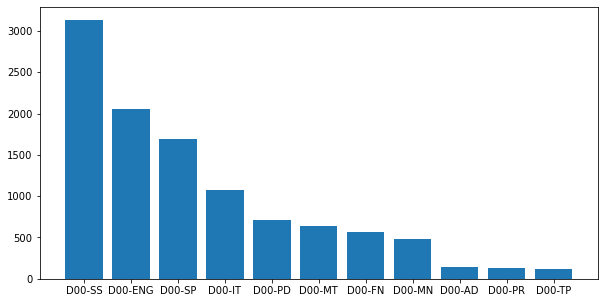

In [28]:
plt.figure(figsize=(10,5))
plt.bar(x=employee_data_train['department'].value_counts().index, height = employee_data_train['department'].value_counts())

# Check for Null Values

In [29]:
employee_data_train.isnull().sum()

avg_monthly_hrs          0
department             557
filed_complaint       9646
last_evaluation       1195
n_projects               0
recently_promoted    11055
salary                   0
satisfaction           116
status                   0
tenure                 116
employee_id              0
dtype: int64

## 4. Impute the missing data <a class="anchor" id="section4"></a>

### Fill up the other Missing Not at random columns

In [30]:
# Filed complaint fill with 0
null_index = employee_data_train[employee_data_train['filed_complaint'].isnull()].index
employee_data_train.loc[null_index, 'filed_complaint'] = 0

# Recently promoted with 0
null_index = employee_data_train[employee_data_train['recently_promoted'].isnull()].index
employee_data_train.loc[null_index, 'recently_promoted'] = 0

In [31]:
employee_data_train.isnull().sum()

avg_monthly_hrs         0
department            557
filed_complaint         0
last_evaluation      1195
n_projects              0
recently_promoted       0
salary                  0
satisfaction          116
status                  0
tenure                116
employee_id             0
dtype: int64

#### Fixing the tenure and satisfaction column

In [32]:
employee_data[employee_data['tenure'].isnull()]['department'].unique()

array(['D00-TP'], dtype=object)

The rows with null tenure values all belong to 'D00-TP' department.'D00-TP' is Temp department.
So possibly these are temporary employees and hence their tenure or other data such as last_evaluation satisfaction may not be present, as these attributes will be applicable only to the permanent staff. <br><br>
Also as mentioned in the problem statement, the client only wants to deal with the data that is related to permanent employees. So, would have dropped the rows but retaining them for integrity of the test results as the test dataset has rows belonging to D00-TP (Temp) department.

Hence, proceeding with filling in 1 for tenure and 0 for satisfaction for the null values.
1 is chosen for tenure null values as putting in 0 yrs doesn't seem right.

In [33]:
employee_data_train['tenure'].fillna(value=1, inplace=True)
employee_data_train['satisfaction'].fillna(value=0.0, inplace=True)

#### check for null values again

In [34]:
employee_data_train.isnull().sum()

avg_monthly_hrs         0
department            557
filed_complaint         0
last_evaluation      1195
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
employee_id             0
dtype: int64

In [35]:
employee_data_train.shape

(11302, 11)

##### Check the correlation between satisfaction and last evaluation

In [36]:
employee_data_train[['last_evaluation', 'satisfaction','avg_monthly_hrs','n_projects','tenure']].corr()

,last_evaluation,satisfaction,avg_monthly_hrs,n_projects,tenure
last_evaluation,1.000000,0.096404,0.340760,0.344547,0.134367
satisfaction,0.096404,1.000000,0.039601,-0.089691,-0.048572
avg_monthly_hrs,0.340760,0.039601,1.000000,0.436494,0.146994
n_projects,0.344547,-0.089691,0.436494,1.000000,0.220765
tenure,0.134367,-0.048572,0.146994,0.220765,1.000000


### Fixing Last evaluation column

In [37]:
employee_data_train['last_evaluation'].describe()

count    10107.000000
mean         0.717667
std          0.172743
min          0.317279
25%          0.563882
50%          0.723653
75%          0.870108
max          1.000000
Name: last_evaluation, dtype: float64

In [38]:
last_eval_dataset_train = employee_data_train.drop(['employee_id', 'department','status'], axis=1)
last_eval_dataset_train.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
13343,145.0,0.0,0.692696,5,0.0,medium,0.941951,2.0
13552,241.0,0.0,0.798338,5,0.0,medium,0.713277,2.0
13100,190.0,0.0,0.791673,4,0.0,medium,0.647329,2.0
1220,128.0,0.0,0.516555,2,0.0,low,0.432162,3.0
13393,191.0,0.0,0.744751,4,0.0,high,0.610375,3.0


In [39]:
last_eval_dataset_train.isnull().sum()

avg_monthly_hrs         0
filed_complaint         0
last_evaluation      1195
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
tenure                  0
dtype: int64

In [40]:
last_eval_dataset_train.dtypes

avg_monthly_hrs      float64
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
tenure               float64
dtype: object

#### Dummify the categorical columns

In [41]:
#last_eval_dataset_prep_dummy = pd.get_dummies(last_eval_dataset_prep, columns=['department', 'salary', 'status'], drop_first=True)
last_eval_dataset_dummy_train = pd.get_dummies(last_eval_dataset_train, columns=['salary'], drop_first=True)

In [42]:
print(last_eval_dataset_dummy_train.shape)

(11302, 9)


#### Prepare the train & test dataset for last_evaluation regression

Null value rows of last evaluation goes into the test dataset

In [43]:
last_eval_train = last_eval_dataset_dummy_train[~last_eval_dataset_dummy_train['last_evaluation'].isnull()]
last_eval_test = last_eval_dataset_dummy_train[last_eval_dataset_dummy_train['last_evaluation'].isnull()]

In [44]:
print(last_eval_train.shape)
print(last_eval_test.shape)

(10107, 9)
(1195, 9)


#### Prepare the X & y target variables

In [45]:
X_train = last_eval_train.loc[:, last_eval_train.columns!='last_evaluation']
y_train = last_eval_train.loc[:, 'last_evaluation']

In [46]:
print(X_train.shape)
print(y_train.shape)

(10107, 8)
(10107,)


In [47]:
X_test = last_eval_test.loc[:, last_eval_test.columns!='last_evaluation']

In [48]:
print(X_test.shape)

(1195, 8)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

##### Scaling the dataset only for regression and KNeighbors Regressor

In [50]:
'''
std = StandardScaler() # skip this step for Decision Tree algorithm
std.fit(X_train) # skip this step for Decision Tree algorithm
'''

'\nstd = StandardScaler() # skip this step for Decision Tree algorithm\nstd.fit(X_train) # skip this step for Decision Tree algorithm\n'

In [51]:
'''
X_train_scaled = std.transform(X_train) # skip this step for Decision Tree algorithm
'''

'\nX_train_scaled = std.transform(X_train) # skip this step for Decision Tree algorithm\n'

 ##### ML Algorithms for predicting Null values of last_eval dataset

In [52]:
#poly = PolynomialFeatures(degree=5)
#X_train_scaled_poly = poly.fit_transform(X_train_scaled, y_train)

#obj = LinearRegression()
#obj = KNeighborsRegressor()
#obj = DecisionTreeRegressor(min_samples_split=3, max_features=15)
last_eval_obj = DecisionTreeRegressor(min_samples_split=3, max_features=5)

In [53]:
# For regression
#obj.fit(X_train_scaled_poly,y_train)
#y_train_pred = obj.predict(X_train_scaled_poly)

# For Decision Tree Regression
last_eval_obj.fit(X_train,y_train)
y_train_pred = last_eval_obj.predict(X_train)

In [54]:
y_train_pred

array([0.6666335, 0.8137415, 0.697027 , ..., 0.677437 , 0.589505 ,
       0.870204 ])

##### Save the trained model

In [55]:
import pickle

with open('last_eval.pickle', 'wb') as f:
    pickle.dump(last_eval_obj, f)

In [56]:
'''from sklearn.model_selection import cross_val_score

cv_scores = []

for k in range(20):
    k = k + 1
    obj = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(obj, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())'''

"from sklearn.model_selection import cross_val_score\n\ncv_scores = []\n\nfor k in range(20):\n    k = k + 1\n    obj = KNeighborsRegressor(n_neighbors=k)\n    scores = cross_val_score(obj, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')\n    cv_scores.append(scores.mean())"

In [57]:
'''
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(range(20), MSE)

plt.show()'''

'\n# changing to misclassification error\nMSE = [1 - x for x in cv_scores]\n\nplt.figure()\nplt.figure(figsize=(15,10))\nplt.title(\'The optimal number of neighbors\', fontsize=20, fontweight=\'bold\')\nplt.xlabel(\'Number of Neighbors K\', fontsize=15)\nplt.ylabel(\'Misclassification Error\', fontsize=15)\nsns.set_style("whitegrid")\nplt.plot(range(20), MSE)\n\nplt.show()'

##### Running K-NN for predicting last_evaluation column

In [58]:
'''
for k in range(3):
    k = k + 1
    obj = KNeighborsRegressor(n_neighbors=k, metric='minkowski', weights='uniform')
    obj.fit(X_train_scaled, y_train)
    y_train_pred = obj.predict(X_train_scaled)
    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    r2_score = metrics.r2_score(y_train, y_train_pred)
    print('K Neighbors : ', k)
    print('MSE of last_evaluation prediction', round(mse_train,2))
    print('R2_Score of last_evaluation prediction', round(r2_score,2))
'''

"\nfor k in range(3):\n    k = k + 1\n    obj = KNeighborsRegressor(n_neighbors=k, metric='minkowski', weights='uniform')\n    obj.fit(X_train_scaled, y_train)\n    y_train_pred = obj.predict(X_train_scaled)\n    mse_train = metrics.mean_squared_error(y_train, y_train_pred)\n    r2_score = metrics.r2_score(y_train, y_train_pred)\n    print('K Neighbors : ', k)\n    print('MSE of last_evaluation prediction', round(mse_train,2))\n    print('R2_Score of last_evaluation prediction', round(r2_score,2))\n"

In [59]:
#obj = KNeighborsRegressor(n_neighbors=2, metric='minkowski', weights='uniform')
#obj.fit(X_train_scaled, y_train)
#y_train_pred = obj.predict(X_train_scaled)

In [60]:
'''
from sklearn.model_selection import cross_val_score

scores = cross_val_score(obj, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
'''

"\nfrom sklearn.model_selection import cross_val_score\n\nscores = cross_val_score(obj, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')\n"

In [61]:
#obj.fit(X_train, y_train)
#y_train_pred = last_eval_obj.predict(X_train)

#### Check prediction MSE & RMSE of Last_eval score

In [62]:
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_score = metrics.r2_score(y_train, y_train_pred)
print('MSE of last_evaluation prediction', round(mse_train,2))
print('R2_Score of last_evaluation prediction', round(r2_score,2))

MSE of last_evaluation prediction 0.0
R2_Score of last_evaluation prediction 0.96


##### Check the distributions

Text(0.5, 1.0, 'Predicted')

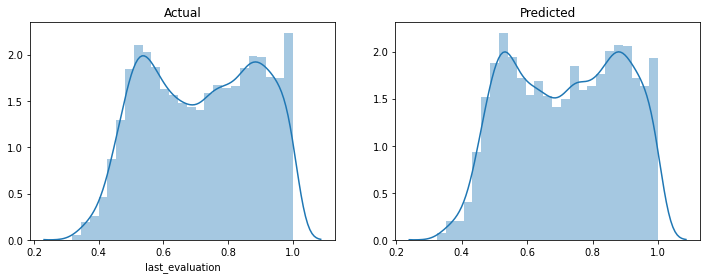

In [63]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.distplot(y_train,ax=ax[0])
sns.distplot(y_train_pred, ax=ax[1])
ax[0].set_title('Actual')
ax[1].set_title('Predicted')

##### Prepare test data

In [64]:
# only for Knn and linear regression
#X_test_scaled = std.transform(X_test)

##### Predict for the null values

In [65]:
y_test_pred = last_eval_obj.predict(X_test)
#y_test_pred = obj.predict(X_test_scaled)
print(y_test_pred)
print("Length of test prediction: ", len(y_test_pred))

[0.7782015 0.722686  0.961675  ... 0.550837  0.7546775 0.63449  ]
Length of test prediction:  1195


#### Check the distribution for overall data

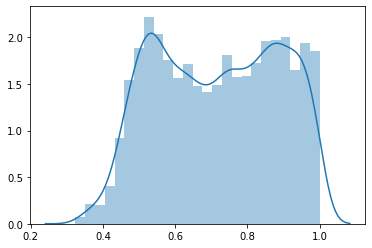

In [66]:
sns.distplot(np.concatenate((y_train_pred, y_test_pred), axis=0))

Prediction appears to be fine. We can proceed with updating the null values.

#### Update the null values with the predicited satisfaction scores

In [67]:
employee_data_train.loc[last_eval_test.index, 'last_evaluation'] = y_test_pred

In [68]:
employee_data_train['last_evaluation'].isnull().sum()

0

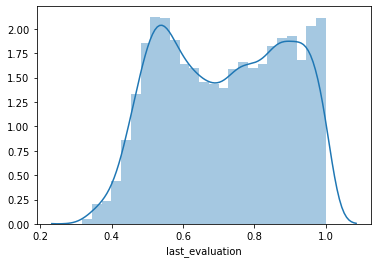

In [69]:
sns.distplot(employee_data_train['last_evaluation'])

## FIxing the department column

In [70]:
employee_data_train.isnull().sum()

avg_monthly_hrs        0
department           557
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
employee_id            0
dtype: int64

In [71]:
department_data['dept_id'].values

array(['D00-IT', 'D00-SS', 'D00-TP', 'D00-ENG', 'D00-SP', 'D00-FN',
       'D00-PR', 'D00-AD', 'D00-MN', 'D00-MT', 'D00-PD'], dtype=object)

In [72]:
employee_data['department'].unique()

array([nan, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN', '-IT'],
      dtype=object)

#### Prepare the employee data for department prediction

In [73]:
dept_dataset_train = employee_data_train.drop(['employee_id','status'], axis=1)

In [74]:
dept_dataset_train.isnull().sum()

avg_monthly_hrs        0
department           557
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
tenure                 0
dtype: int64

#### Prepare the train and test data

In [75]:
# Dummify the data
dept_data_dummy_train = pd.get_dummies(dept_dataset_train, columns=['salary'], drop_first=True)

# Split into train and test
dept_data_train = dept_data_dummy_train[~dept_data_dummy_train['department'].isnull()]
dept_data_test = dept_data_dummy_train[dept_data_dummy_train['department'].isnull()]

#### Label encode the department data

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(dept_data_train['department'])

# storing the label encoder object
with open('label_encoder.pickle', 'wb') as f:
    pickle.dump(le, f)

In [77]:
dept_data_train['dept_code'] = le.transform(dept_data_train['department'])
dept_data_train.head()

C:\Users\sudeepm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_low,salary_medium,dept_code
13343,145.0,D00-PD,0.0,0.692696,5,0.0,0.941951,2.0,0,1,6
13552,241.0,D00-SS,0.0,0.798338,5,0.0,0.713277,2.0,0,1,9
13100,190.0,D00-SS,0.0,0.791673,4,0.0,0.647329,2.0,0,1,9
1220,128.0,D00-SS,0.0,0.516555,2,0.0,0.432162,3.0,1,0,9
13393,191.0,D00-IT,0.0,0.744751,4,0.0,0.610375,3.0,0,0,3


#### Putting all the non-values into train dataset and the null values into a test dataset

In [78]:
X_train = dept_data_train.loc[:, ~dept_data_train.columns.isin(['department','dept_code'])]
y_train = dept_data_train.loc[:, 'dept_code']

In [79]:
print(X_train.shape)
print(y_train.shape)

(10745, 9)
(10745,)


In [80]:
X_test = dept_data_test.loc[:, dept_data_test.columns!='department']

In [81]:
print(X_test.shape)

(557, 9)


In [82]:
X_train.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_low,salary_medium
13343,145.0,0.0,0.692696,5,0.0,0.941951,2.0,0,1
13552,241.0,0.0,0.798338,5,0.0,0.713277,2.0,0,1
13100,190.0,0.0,0.791673,4,0.0,0.647329,2.0,0,1
1220,128.0,0.0,0.516555,2,0.0,0.432162,3.0,1,0
13393,191.0,0.0,0.744751,4,0.0,0.610375,3.0,0,0


### Scaling the dataset prior to ML algorithm

In [83]:
'''
from sklearn.preprocessing import StandardScaler

std = StandardScaler() # not required for Decision Tree
std.fit(X_train) # not required for Decision Tree
X_train_scaled = std.transform(X_train) # not required for Decision Tree
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nstd = StandardScaler() # not required for Decision Tree\nstd.fit(X_train) # not required for Decision Tree\nX_train_scaled = std.transform(X_train) # not required for Decision Tree\n'

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

dept_obj = DecisionTreeClassifier(min_samples_split=2, max_features=8, max_depth=40)
dept_obj.fit(X_train, y_train) 
#obj = KNeighborsClassifier()
#obj.fit(X_train_scaled, y_train)
#y_train_pred = obj.predict(X_train_scaled) #not required for Dtree
y_train_pred = dept_obj.predict(X_train) 

In [85]:
y_train_pred

array([6, 9, 9, ..., 8, 9, 9])

##### Save the trained model for department prediction

In [86]:
import pickle

with open('dept_pred.pickle', 'wb') as f:
    pickle.dump(dept_obj, f)

#### Model Evaluation

In [87]:
from sklearn import metrics

In [88]:
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
print('Accuracy for training set is {}'.format(train_accuracy))

Accuracy for training set is 0.9966496044671941


#### Cross Validation

In [89]:
'''
for k in range(3):
    k = k + 1
    obj = KNeighborsClassifier(n_neighbors=k, metric='minkowski', weights='uniform')
    obj.fit(X_train_scaled, y_train)
    y_train_pred = obj.predict(X_train_scaled)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    print('K Neighbors : ', k)
    print('Accuracy for training set is {}'.format(train_accuracy))
'''

"\nfor k in range(3):\n    k = k + 1\n    obj = KNeighborsClassifier(n_neighbors=k, metric='minkowski', weights='uniform')\n    obj.fit(X_train_scaled, y_train)\n    y_train_pred = obj.predict(X_train_scaled)\n    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)\n    print('K Neighbors : ', k)\n    print('Accuracy for training set is {}'.format(train_accuracy))\n"

In [90]:
y_train.value_counts()

9     3132
1     2052
8     1691
3     1080
6      709
5      644
2      569
4      476
0      147
7      129
10     116
Name: dept_code, dtype: int64

In [91]:
pd.Series(y_train_pred).value_counts()

9     3139
1     2059
8     1687
3     1080
6      710
5      639
2      568
4      472
0      147
7      128
10     116
dtype: int64

#### Update the test dataset with the predicted values

In [92]:
y_test_pred = dept_obj.predict(X_test)
print(len(y_test_pred))

557


In [93]:
dept_data_test.loc[:,'dept_code'] = y_test_pred
dept_data_test

C:\Users\sudeepm\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sudeepm\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_low,salary_medium,dept_code
7658,137.0,NaN,0.0,0.771485,3,0.0,0.301302,5.0,1,0,6
71,153.0,NaN,0.0,0.530645,2,0.0,0.455101,3.0,1,0,5
12692,274.0,NaN,1.0,0.430319,4,0.0,0.197499,5.0,0,1,3
5292,141.0,NaN,0.0,0.595265,2,0.0,0.409132,3.0,0,1,1
9043,270.0,NaN,0.0,0.816645,4,0.0,0.692792,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1385,282.0,NaN,0.0,0.981291,6,0.0,0.063589,4.0,0,1,2
2547,244.0,NaN,0.0,1.000000,5,0.0,0.911679,6.0,1,0,3
10858,141.0,NaN,0.0,0.621710,3,0.0,0.563100,3.0,1,0,9
11892,161.0,NaN,0.0,0.695098,2,0.0,0.611689,5.0,0,1,9


#### Reverse the label mapping for department table

In [94]:
dept_data_test.loc[:,'department'] = le.inverse_transform(y_test_pred)
dept_data_test

C:\Users\sudeepm\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_low,salary_medium,dept_code
7658,137.0,D00-PD,0.0,0.771485,3,0.0,0.301302,5.0,1,0,6
71,153.0,D00-MT,0.0,0.530645,2,0.0,0.455101,3.0,1,0,5
12692,274.0,D00-IT,1.0,0.430319,4,0.0,0.197499,5.0,0,1,3
5292,141.0,D00-ENG,0.0,0.595265,2,0.0,0.409132,3.0,0,1,1
9043,270.0,D00-ENG,0.0,0.816645,4,0.0,0.692792,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1385,282.0,D00-FN,0.0,0.981291,6,0.0,0.063589,4.0,0,1,2
2547,244.0,D00-IT,0.0,1.000000,5,0.0,0.911679,6.0,1,0,3
10858,141.0,D00-SS,0.0,0.621710,3,0.0,0.563100,3.0,1,0,9
11892,161.0,D00-SS,0.0,0.695098,2,0.0,0.611689,5.0,0,1,9


#### Update the null values for department in the employee data

In [95]:
employee_data_train.loc[dept_data_test.index, 'department'] = dept_data_test['department']

In [96]:
employee_data_train['department'].value_counts()

D00-SS     3281
D00-ENG    2158
D00-SP     1773
D00-IT     1136
D00-PD      753
D00-MT      692
D00-FN      606
D00-MN      493
D00-AD      160
D00-PR      134
D00-TP      116
Name: department, dtype: int64

### Final check for all null values

In [97]:
employee_data_train.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
dtype: int64

## Check the size of the employee dataset

In [98]:
print('Final size of employee data: ', len(employee_data_train))
print('Dropped {0} duplicate rows and {1} rows that correspond to 0 employee_id'.format(dup_rows, zero_count[0]))
print('Total dropped rows: ', 11320 - len(employee_data_train))

Final size of employee data:  11302
Dropped 15 duplicate rows and 3 rows that correspond to 0 employee_id
Total dropped rows:  18


### Check out the other datasets

In [99]:
department_data

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [100]:
employee_details_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [101]:
print('# of rows in department_data', len(department_data))
print('# of rows in employee_details_data', len(employee_details_data))
print('# of rows in employee_data', len(employee_data))

# of rows in department_data 11
# of rows in employee_details_data 14245
# of rows in employee_data 14150


### Check for duplicate values in employee_details_data

In [102]:
employee_details_data['employee_id'].value_counts().sum()

14245

As the sum value of 14,245 is equal to # of rows in employee_details_data, there is no duplicate values

### Check for null values

In [103]:
department_data.isnull().sum()

dept_id      0
dept_name    0
dept_head    0
dtype: int64

In [104]:
employee_details_data.isnull().sum()

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

No null values, no duplicate values, so we are good to go ahead with joining the datasets

# Data Merge

### Employee details merge with employee data

In [105]:
details_employee_data_train = employee_data_train.merge(employee_details_data, how='left', on='employee_id')

In [106]:
# Checking for duplicates
details_employee_data_train['employee_id'].value_counts().sum()

11302

In [107]:
details_employee_dept_data_train = details_employee_data_train.merge(department_data, how='left',
                                                         left_on='department', right_on='dept_id')
# Drop the department column name as it is duplicate
details_employee_dept_data_train.drop('department', axis=1, inplace=True)
details_employee_dept_data_train.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,145.0,0.0,0.692696,5,0.0,medium,0.941951,Employed,2.0,110274,36,Female,Married,D00-PD,Product,Darcy Staines
1,241.0,0.0,0.798338,5,0.0,medium,0.713277,Employed,2.0,118256,51,Male,Married,D00-SS,Sales,Edward J Bayley
2,190.0,0.0,0.791673,4,0.0,medium,0.647329,Employed,2.0,110750,22,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,128.0,0.0,0.516555,2,0.0,low,0.432162,Left,3.0,125365,23,Female,Unmarried,D00-SS,Sales,Edward J Bayley
4,191.0,0.0,0.744751,4,0.0,high,0.610375,Employed,3.0,117485,50,Male,Married,D00-IT,IT,Henry Adey


In [108]:
# Check for null
details_employee_dept_data_train.isnull().sum()

avg_monthly_hrs      0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
age                  0
gender               0
marital_status       0
dept_id              0
dept_name            0
dept_head            0
dtype: int64

In [109]:
# Check for dubplicate values
details_employee_dept_data_train['employee_id'].value_counts().sum()

11302

## 5. Exploratory Data Analysis <a class="anchor" id="section5"></a>

In [110]:
dataset = details_employee_dept_data_train.copy()
dataset.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,145.0,0.0,0.692696,5,0.0,medium,0.941951,Employed,2.0,110274,36,Female,Married,D00-PD,Product,Darcy Staines
1,241.0,0.0,0.798338,5,0.0,medium,0.713277,Employed,2.0,118256,51,Male,Married,D00-SS,Sales,Edward J Bayley
2,190.0,0.0,0.791673,4,0.0,medium,0.647329,Employed,2.0,110750,22,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,128.0,0.0,0.516555,2,0.0,low,0.432162,Left,3.0,125365,23,Female,Unmarried,D00-SS,Sales,Edward J Bayley
4,191.0,0.0,0.744751,4,0.0,high,0.610375,Employed,3.0,117485,50,Male,Married,D00-IT,IT,Henry Adey


In [111]:
dataset.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure',
       'employee_id', 'age', 'gender', 'marital_status', 'dept_id',
       'dept_name', 'dept_head'],
      dtype='object')

In [112]:
cols = ['avg_monthly_hrs', 'last_evaluation', 'n_projects','satisfaction','tenure','age']

In [113]:
dataset[cols].corr()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure,age
avg_monthly_hrs,1.000000,0.300293,0.436494,0.039601,0.146994,0.206414
last_evaluation,0.300293,1.000000,0.313838,0.072676,0.108232,0.148122
n_projects,0.436494,0.313838,1.000000,-0.089691,0.220765,0.624283
satisfaction,0.039601,0.072676,-0.089691,1.000000,-0.048572,-0.027239
tenure,0.146994,0.108232,0.220765,-0.048572,1.000000,0.103958
age,0.206414,0.148122,0.624283,-0.027239,0.103958,1.000000


#### Procedure for a different representation of heatmap

In [114]:
def heatmap(x,y,size,colors):
    fig, ax = plt.subplots(figsize=(10,6))
    x_labels = [ v for v in x.unique()]
    y_labels = [ v for v in y.unique()[::-1]]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)}
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)}
    size_scale = 500
    color_min, color_max = [-1,1]
    n_colors = 256
    palette = sns.diverging_palette(10,240,n=n_colors)
    plot_grid = plt.GridSpec(1,15,hspace=0.2, wspace=0.1)
    ax = plt.subplot(plot_grid[:,:-1])
    
    def value_to_color(val):
        val_position = float((val - color_min))/(color_max - color_min)
        ind = int(val_position*(n_colors-1))
        return palette[ind]
    
    ax.scatter(x=x.map(x_to_num),
               y=y.map(y_to_num),
               s=size*size_scale,
               c=colors.apply(value_to_color),
               marker='s')    
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right',fontsize=12)
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels, fontsize=12)
    ax.grid(False,'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t+0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t+0.5 for t in ax.get_yticks()], minor=True)
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()])+0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()])+0.5])
    
    # select the area for the bar
    ax = plt.subplot(plot_grid[:,-1])
    col_x = [0]*len(palette)
    bar_y = np.linspace(color_min, color_max, n_colors)
    bar_height = bar_y[1] - bar_y[0]
    ax.barh(y=bar_y,
            width=[5]*len(palette),
            left=col_x,
            height=bar_height,
            color=palette,
            linewidth=0)
    ax.set_xlim(1,2)
    ax.grid(False)
    ax.set_facecolor('white')
    ax.set_xticks([])
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y),3))
    ax.yaxis.tick_right()

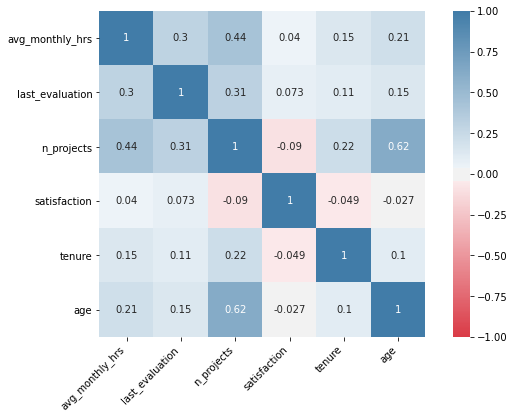

In [115]:
data_corr = dataset[cols].corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(data_corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(10,240,n=256),square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

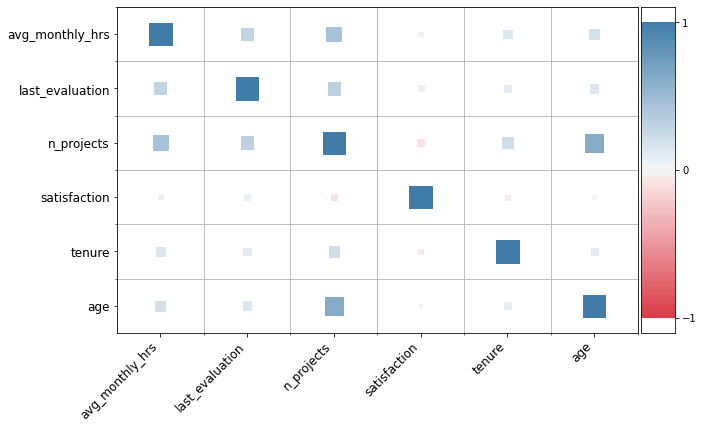

In [116]:
data_corr = dataset[cols].corr()
data_corr = pd.melt(data_corr.reset_index(), id_vars='index')
data_corr.columns = ['x','y','value']
heatmap(x=data_corr['x'], y=data_corr['y'], size=data_corr['value'].abs(),colors=data_corr['value'])

From the above correlation matrix, we comment on the following points:
<br><br>
<b>Avg Monthly hrs:</b>
- As the number of project assignments for an employee increases, he clocks more time
- Though the correlation is weak, but we can say that more the time the employee works chances are that he may be dissatisfied
- Also more the time spent in office, higher is the evaluation score
- Senior people(age & tenure) tend to spend more time in office
<br><br>
<b>Last evaluation</b>
- People spending more time in office have a greater chance of getting a high evaluation score
- People who stay with the company have a better chance of getting a higer evaluation score
- People who get a higher evaluation score tend to be more satisfied
- People with higher evaluation score tend to have higher project assignments
<br><br>
<b>n_projects</b>
- Senior people(age & tenure) tend to get more project assignments
- Too many project assignments is also a strong reason for dissatisfaction
- Though the correlation is weak, senior people (in age & tenure) tend to be more dissatisfied

# Feature Selection

In [117]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [118]:
feat_dataset = dataset.copy()
feat_dataset.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,145.0,0.0,0.692696,5,0.0,medium,0.941951,Employed,2.0,110274,36,Female,Married,D00-PD,Product,Darcy Staines
1,241.0,0.0,0.798338,5,0.0,medium,0.713277,Employed,2.0,118256,51,Male,Married,D00-SS,Sales,Edward J Bayley
2,190.0,0.0,0.791673,4,0.0,medium,0.647329,Employed,2.0,110750,22,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,128.0,0.0,0.516555,2,0.0,low,0.432162,Left,3.0,125365,23,Female,Unmarried,D00-SS,Sales,Edward J Bayley
4,191.0,0.0,0.744751,4,0.0,high,0.610375,Employed,3.0,117485,50,Male,Married,D00-IT,IT,Henry Adey


In [119]:
drop_cols = ['dept_name', 'employee_id']

In [120]:
feat_dataset.drop(drop_cols, axis=1, inplace=True)
feat_dataset.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,dept_id,dept_head
0,145.0,0.0,0.692696,5,0.0,medium,0.941951,Employed,2.0,36,Female,Married,D00-PD,Darcy Staines
1,241.0,0.0,0.798338,5,0.0,medium,0.713277,Employed,2.0,51,Male,Married,D00-SS,Edward J Bayley
2,190.0,0.0,0.791673,4,0.0,medium,0.647329,Employed,2.0,22,Female,Unmarried,D00-SS,Edward J Bayley
3,128.0,0.0,0.516555,2,0.0,low,0.432162,Left,3.0,23,Female,Unmarried,D00-SS,Edward J Bayley
4,191.0,0.0,0.744751,4,0.0,high,0.610375,Employed,3.0,50,Male,Married,D00-IT,Henry Adey


#### encode the binary value columns in the feature dataset

In [121]:
feat_dataset['status'] = feat_dataset['status'].map({'Left':1, 'Employed':0})
feat_dataset['gender'] = feat_dataset['gender'].map({'Female':0, 'Male':1})
feat_dataset['marital_status'] = feat_dataset['marital_status'].map({'Unmarried':0, 'Married':1})

In [122]:
feat_dataset.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,dept_id,dept_head
0,145.0,0.0,0.692696,5,0.0,medium,0.941951,0,2.0,36,0,1,D00-PD,Darcy Staines
1,241.0,0.0,0.798338,5,0.0,medium,0.713277,0,2.0,51,1,1,D00-SS,Edward J Bayley
2,190.0,0.0,0.791673,4,0.0,medium,0.647329,0,2.0,22,0,0,D00-SS,Edward J Bayley
3,128.0,0.0,0.516555,2,0.0,low,0.432162,1,3.0,23,0,0,D00-SS,Edward J Bayley
4,191.0,0.0,0.744751,4,0.0,high,0.610375,0,3.0,50,1,1,D00-IT,Henry Adey


#### Dummify the other columns which have multiple categories

In [123]:
dummy_cols = ['salary', 'dept_id', 'dept_head']
feat_dataset_dummy = pd.get_dummies(feat_dataset, columns=dummy_cols, drop_first=True)

### Creating an arrya of dataset values and splitting into X & target variable y

In [124]:
X = feat_dataset_dummy.loc[:, feat_dataset_dummy.columns!='status'].values
y = feat_dataset_dummy.loc[:, 'status'].values

In [125]:
print(X.shape)
print(y.shape)

(11302, 32)
(11302,)


#### Using SelectKBest to select 5 best features

In [126]:
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X, y)

In [127]:
# Summarizing the scores
np.set_printoptions(precision=3)
print(fit.scores_)

[6.329e+01 2.893e+02 3.142e-01 8.145e+00 4.559e+01 1.683e+03 2.472e+02
 2.747e+01 1.719e+02 6.288e+01 2.127e+02 5.976e+01 5.715e+00 3.612e+00
 3.189e+00 3.041e+01 3.033e-01 1.431e+00 1.472e+01 2.083e+00 1.767e+00
 5.308e+00 2.083e+00 1.431e+00 1.767e+00 3.041e+01 3.006e-02 3.189e+00
 1.472e+01 5.308e+00 3.033e-01 5.715e+00]


In [128]:
# Creating list of feature names
feat_names = feat_dataset_dummy.columns[feat_dataset_dummy.columns !='status']

In [129]:
# Sorting the sores by descending order
for score, name in sorted(zip(fit.scores_, feat_names), reverse=True):
    print('Feature Score of', name, ':', round(score,2))

Feature Score of satisfaction : 1682.57
Feature Score of filed_complaint : 289.29
Feature Score of tenure : 247.24
Feature Score of salary_low : 212.68
Feature Score of gender : 171.87
Feature Score of avg_monthly_hrs : 63.29
Feature Score of marital_status : 62.88
Feature Score of salary_medium : 59.76
Feature Score of recently_promoted : 45.59
Feature Score of dept_id_D00-MN : 30.41
Feature Score of dept_head_Ellie Trafton : 30.41
Feature Score of age : 27.47
Feature Score of dept_id_D00-PR : 14.72
Feature Score of dept_head_Louie Viles : 14.72
Feature Score of n_projects : 8.15
Feature Score of dept_id_D00-ENG : 5.71
Feature Score of dept_head_Sushant Raghunathan K : 5.71
Feature Score of dept_id_D00-TP : 5.31
Feature Score of dept_head_Micheal Zachrey : 5.31
Feature Score of dept_id_D00-FN : 3.61
Feature Score of dept_id_D00-IT : 3.19
Feature Score of dept_head_Henry Adey : 3.19
Feature Score of dept_id_D00-SP : 2.08
Feature Score of dept_head_Amelia Westray : 2.08
Feature Score of

From the above we can note the below columns as important in determining their exit status in order of importance
1. satisfaction 
2. filed_complaint 
3. tenure
4. salary
5. gender
6. marital_status
7. avg_monthly_hrs
8. recently_promoted 
9. age
10. dept
11. dept_head
12. last_evaluation
13. n_projects

## Explore the distribution of the dataset

### Target variable status for class imbalance

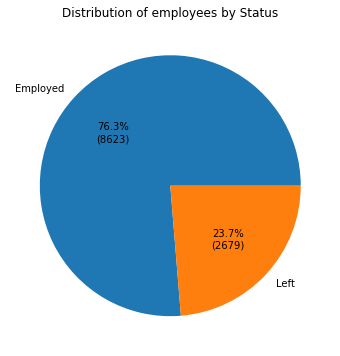

In [130]:
def func(pct, allvalues): 
    absolute = int(round((pct / 100.*np.sum(allvalues)),0))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.figure(figsize=(10,6))
plt.pie(dataset['status'].value_counts(),
        labels=dataset['status'].value_counts().index,
        autopct=lambda pct: func(pct, dataset['status'].value_counts()));
plt.title('Distribution of employees by Status');

There is class imbalance which needs to addressed while running our predictive algorithms.

### Distribution of employees by department

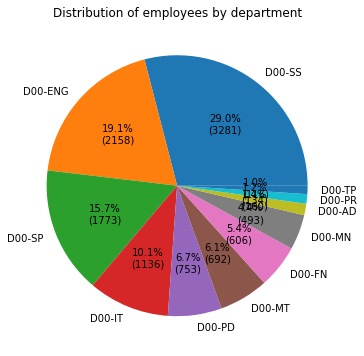

In [131]:
plt.figure(figsize=(10,6))
plt.pie(dataset['dept_id'].value_counts(),
        labels=dataset['dept_id'].value_counts().index,
        autopct=lambda pct: func(pct, dataset['dept_id'].value_counts()))
plt.title('Distribution of employees by department');

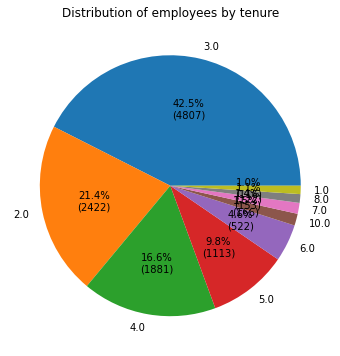

In [132]:
plt.figure(figsize=(10,6))
plt.pie(dataset['tenure'].value_counts(),
        labels=dataset['tenure'].value_counts().index,
        autopct=lambda pct: func(pct, dataset['tenure'].value_counts()))
plt.title('Distribution of employees by tenure');

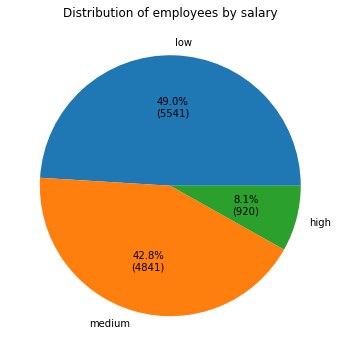

In [133]:
plt.figure(figsize=(10,6))
plt.pie(dataset['salary'].value_counts(),
        labels=dataset['salary'].value_counts().index,
        autopct=lambda pct: func(pct, dataset['salary'].value_counts()))
plt.title('Distribution of employees by salary');

# Compare the target variable with the rest

### Function to plot stacked bar charts against other categorical columns

In [134]:
def plot_stacked_bars_category(groupbycol):
    col_status = pd.DataFrame(dataset[dataset['status']=='Employed'].groupby(groupbycol)['status'].count())
    col_status['Left'] = dataset[dataset['status']=='Left'].groupby(groupbycol)['status'].count()
    col_status.columns = ['Employed', 'Left']
    col_status.fillna(value=0, inplace=True)
    col_status['Employed_%'] = [float("{:0.2f}".format(row.Employed/(row.Left+row.Employed))) for row in col_status.itertuples()]
    col_status['Left_%'] = [float("{:0.2f}".format(row.Left/(row.Left+row.Employed))) for row in col_status.itertuples()]
    print(col_status)

    # stacked graph
    plt.figure(figsize=(10,6))
    p1 = plt.bar(col_status.index, col_status['Employed'], 0.4)
    p2 = plt.bar(col_status.index, col_status['Left'], 0.4, bottom=col_status['Employed'])
    plt.legend((p1[0], p2[0]), ('Employed', 'Left'))
    plt.title('Employed vs Left split by '+groupbycol)
    plt.xticks(rotation=45);
    
    # stacked graph on %
    plt.figure(figsize=(10,6))
    p1 = plt.bar(col_status.index, col_status['Employed_%'], 0.4)
    p2 = plt.bar(col_status.index, col_status['Left_%'], 0.4, bottom=col_status['Employed_%'])
    plt.legend((p1[0], p2[0]), ('Employed', 'Left'))
    plt.title('Employed vs Left split by '+ groupbycol+' as a %')
    plt.xticks(rotation=45);
    
    # Cluster Graph with avg line
    avg_attrition = np.sum(col_status['Left'])/(np.sum(col_status['Employed'])+np.sum(col_status['Left']))
    width = 0.35
    ind = np.arange(len(col_status))

    fig, ax = plt.subplots(figsize=(10,6))

    rect1 = ax.bar(ind-width/2, col_status['Employed_%'], width, label='Employed')
    rect2 = ax.bar(ind+width/2, col_status['Left_%'], width, label='Left')
    line1 = ax.plot(np.arange(0,len(col_status)), np.array([avg_attrition]*len(col_status)), color='red', label='Avg Attrition')
    ax.legend()
    ax.set_title('Employed vs Left split by '+groupbycol+' compared to average')
    ax.set_xticks(ind)
    ax.set_xticklabels(col_status.index, rotation=45);

    for x,y in zip(ind-width/2, col_status['Employed_%']):
        label = "{:.2f}".format(y)
        ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='center')

    for x,y in zip(ind+width/2, col_status['Left_%']):
        label = "{:.2f}".format(y)
        ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='center')

In [135]:
def plot_stacked_bars_continous(cat_col):
    exit_series = dataset.groupby('status')[cat_col].mean()
    avg_score = dataset[cat_col].mean()
    avg_score_label = 'Avg '+str(cat_col)
    width = 0.35
    fig, ax = plt.subplots(figsize=(10,6))
    ind = np.arange(len(exit_series.index))
    rect1 = ax.bar(ind, exit_series, width)
    line1 = ax.plot(np.arange(0,len(exit_series)), np.array([avg_score]*len(exit_series)),
                    color='red', label=avg_score_label)

    # add data labels
    for x,y in zip(ind, exit_series):
        label = "{:.2f}".format(y)
        ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,5), ha='center')

    ax.set_title(cat_col+' across employee exit status')
    ax.set_xticks(ind)
    ax.set_xticklabels(exit_series.index);

## Explore the Categorical Columns

#### Department vs Status

         Employed  Left  Employed_%  Left_%
dept_id                                    
D00-AD        123    37        0.77    0.23
D00-ENG      1604   554        0.74    0.26
D00-FN        443   163        0.73    0.27
D00-IT        891   245        0.78    0.22
D00-MN        427    66        0.87    0.13
D00-MT        522   170        0.75    0.25
D00-PD        588   165        0.78    0.22
D00-PR        121    13        0.90    0.10
D00-SP       1329   444        0.75    0.25
D00-SS       2476   805        0.75    0.25
D00-TP         99    17        0.85    0.15


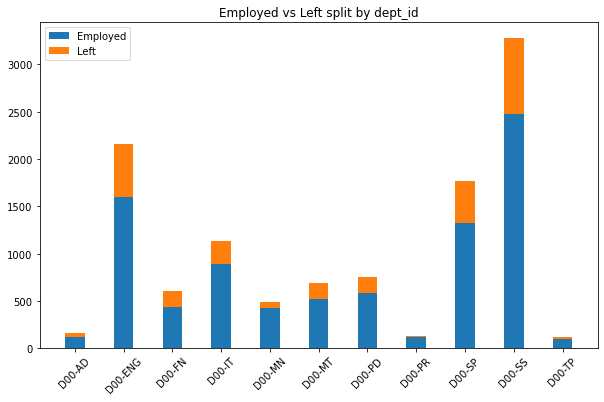

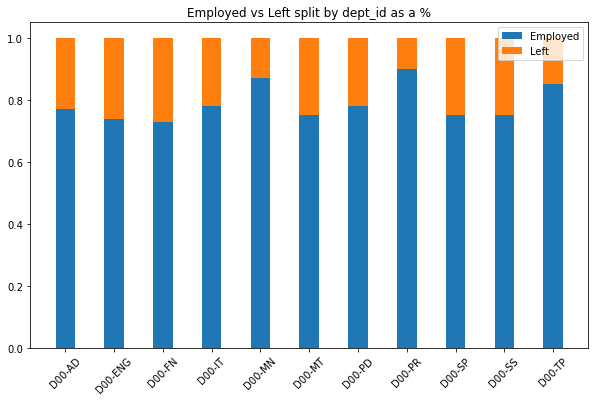

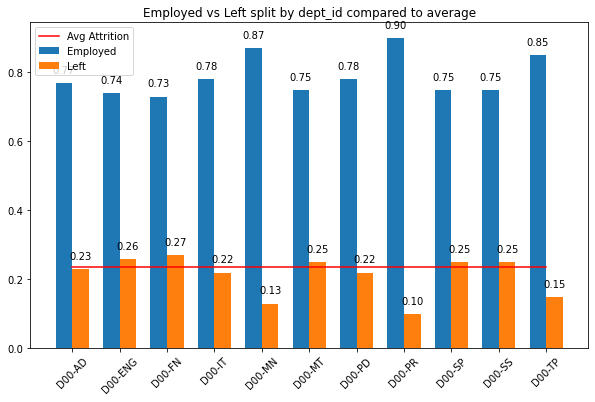

In [136]:
plot_stacked_bars_category('dept_id')

It is difficult to make a strong statement that any one department has seen higher attrition compared to others

### Salary level vs status

        Employed  Left  Employed_%  Left_%
salary                                    
high         856    64        0.93    0.07
low         3901  1640        0.70    0.30
medium      3866   975        0.80    0.20


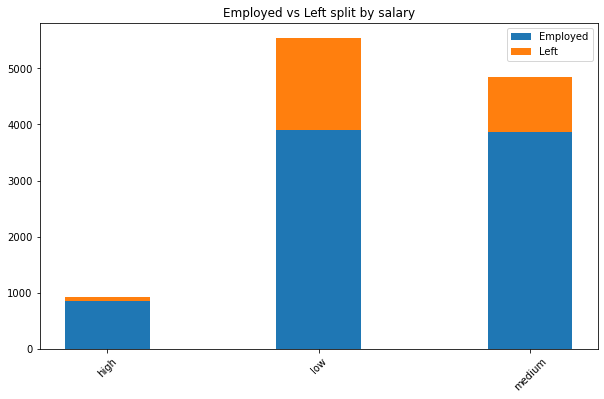

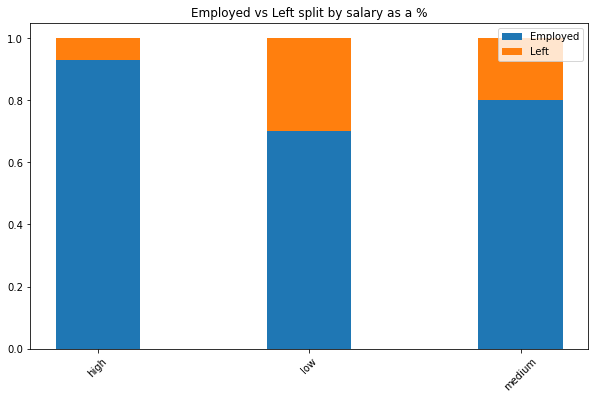

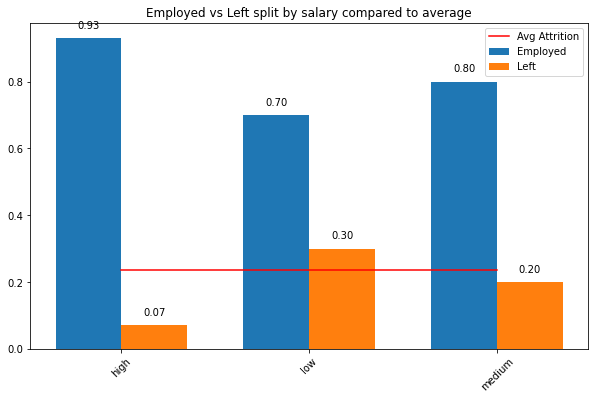

In [137]:
plot_stacked_bars_category('salary')

Low salaried employees tend to leave more

        Employed    Left  Employed_%  Left_%
tenure                                      
1.0           99    17.0        0.85    0.15
2.0         2384    38.0        0.98    0.02
3.0         3629  1178.0        0.75    0.25
4.0         1229   652.0        0.65    0.35
5.0          477   636.0        0.43    0.57
6.0          364   158.0        0.70    0.30
7.0          153     0.0        1.00    0.00
8.0          122     0.0        1.00    0.00
10.0         166     0.0        1.00    0.00


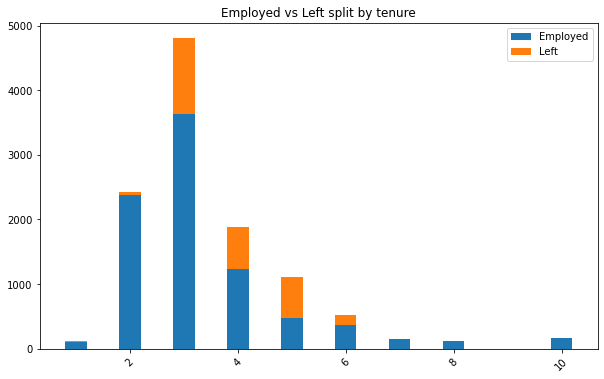

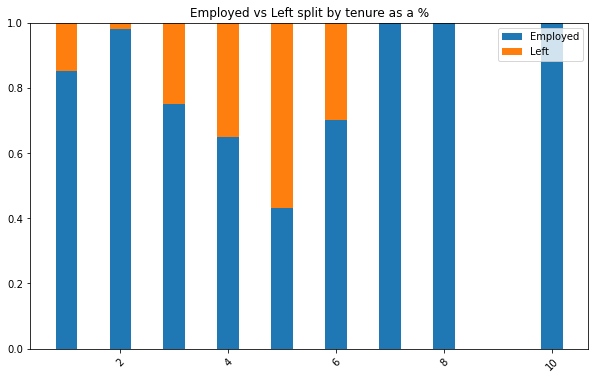

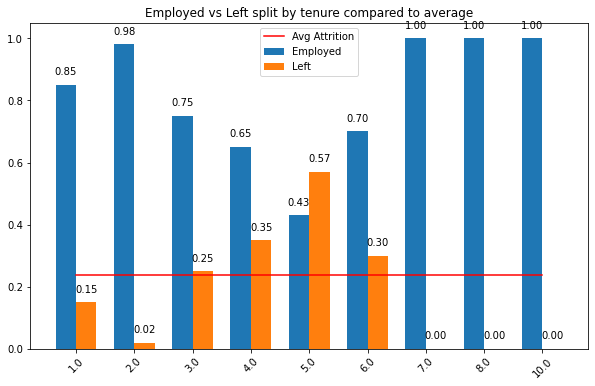

In [138]:
plot_stacked_bars_category('tenure')

Highest attrition is seen among employees 4 to 6 years old in the company. Employees who have completed 5 years have the highest attrition

                   Employed  Left  Employed_%  Left_%
recently_promoted                                    
0.0                    8390  2665        0.76    0.24
1.0                     233    14        0.94    0.06


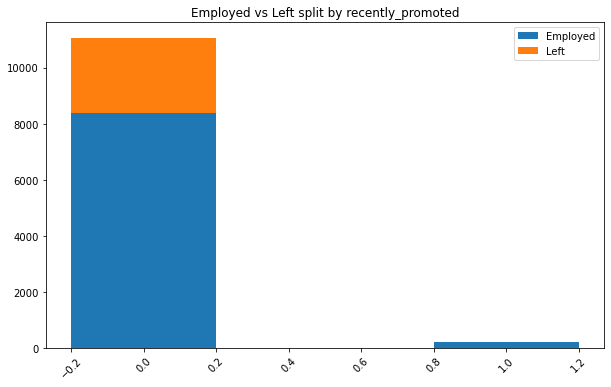

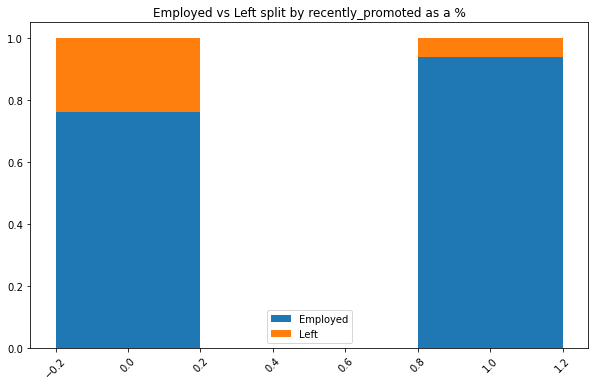

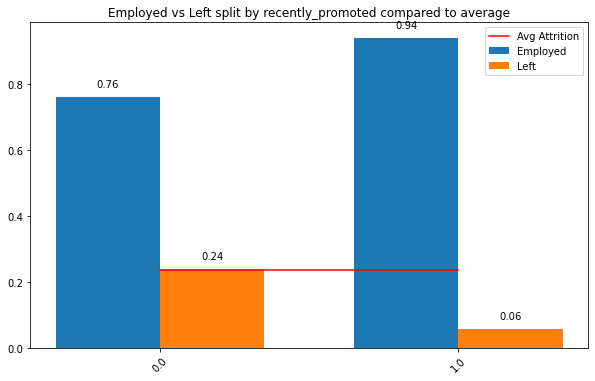

In [139]:
plot_stacked_bars_category('recently_promoted')

It is obvious that promotion works as good method to retain employees, but attrition among not promoted employees is around average, which is not enough for us to make a strong statement

            Employed  Left  Employed_%  Left_%
n_projects                                    
1                 38     6        0.86    0.14
2                668  1171        0.36    0.64
3               3000    60        0.98    0.02
4               2939   311        0.90    0.10
5               1586   466        0.77    0.23
6                392   477        0.45    0.55


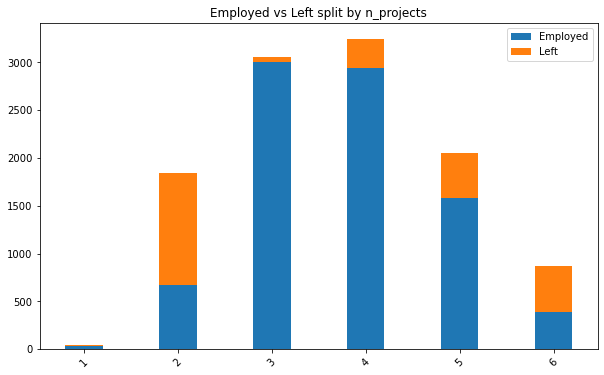

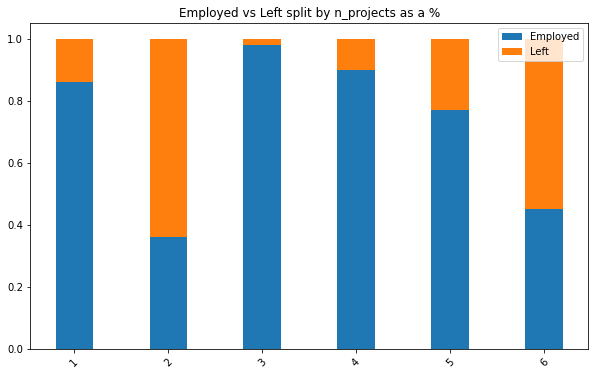

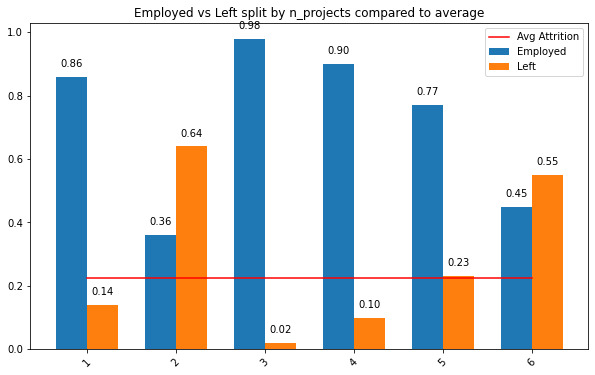

In [140]:
plot_stacked_bars_category('n_projects')

Too many projects makes people leave the company. Too less project assignment also makes people leave company. <b>3 - 5</b> projects appears to be optimal

                 Employed  Left  Employed_%  Left_%
filed_complaint                                    
0.0                  7091  2555        0.74    0.26
1.0                  1532   124        0.93    0.07


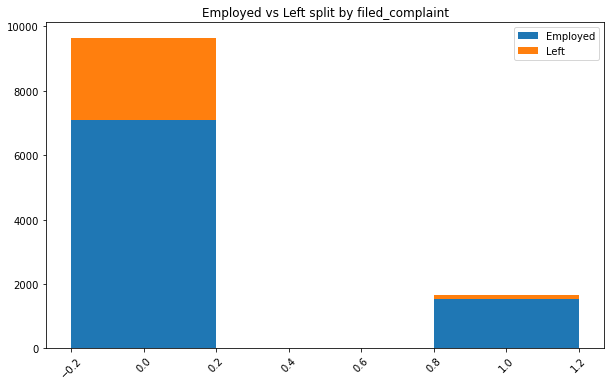

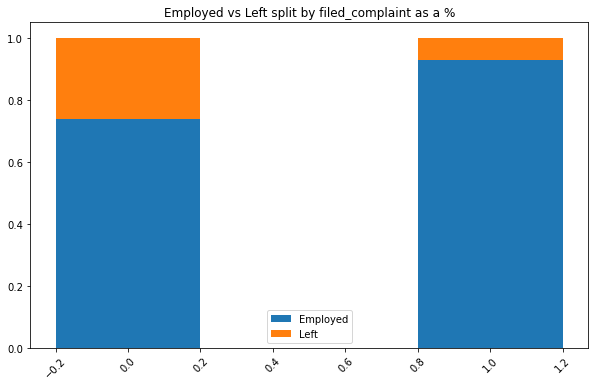

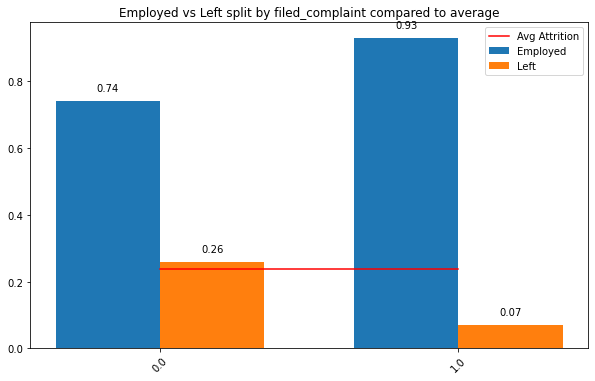

In [141]:
plot_stacked_bars_category('filed_complaint')

People who have filed complaint, obviously have some dissatisfaction and are more likely to leave

        Employed  Left  Employed_%  Left_%
gender                                    
Female      2634  1183        0.69    0.31
Male        5989  1496        0.80    0.20


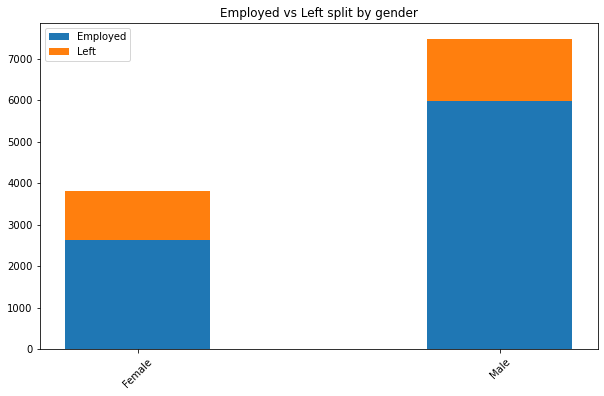

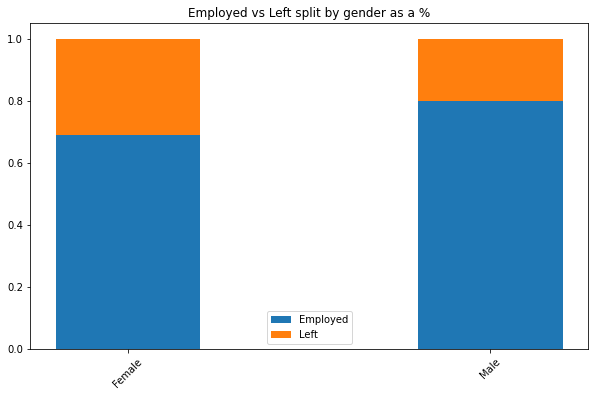

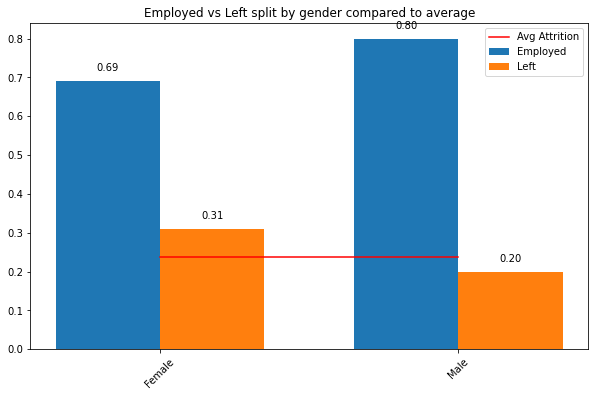

In [142]:
plot_stacked_bars_category('gender')

Female tend to leave the organization higher than males

                Employed  Left  Employed_%  Left_%
marital_status                                    
Married             4375  1125        0.80    0.20
Unmarried           4248  1554        0.73    0.27


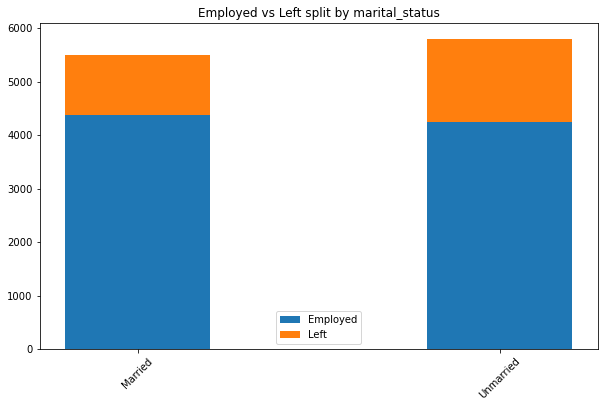

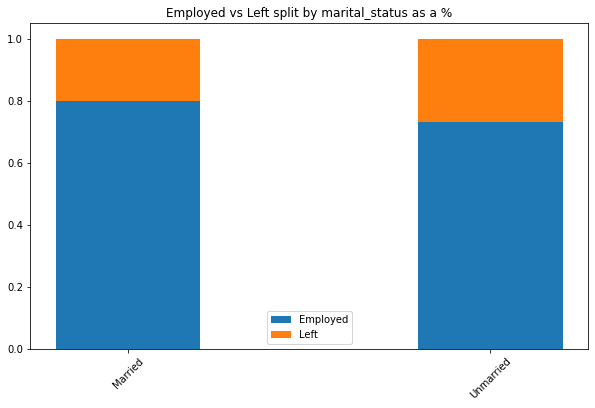

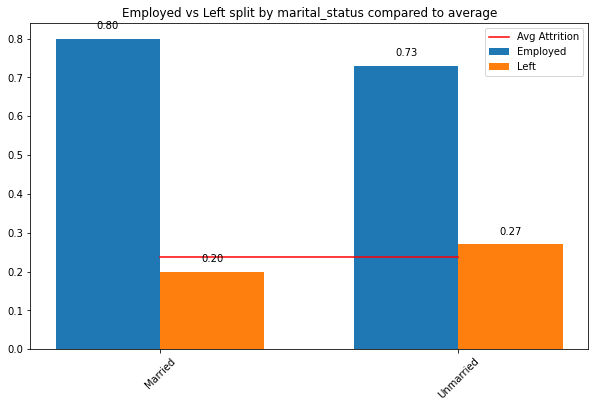

In [143]:
plot_stacked_bars_category('marital_status')

There appears to be higher attrition among unmarried employees. One other dimension we can check is, among the married & unmarried employees, how is the exit status by Female & Male. We want to check if marriage has a different impact on females and males

#### Creating the matrix for Marital Exits between Female & Male

In [144]:
marital_exits = pd.pivot_table(dataset[dataset['marital_status']=='Married'],
                                       index='gender', columns='status', values='employee_id', aggfunc='count')
marital_exits.loc['Female', 'Employed_%'] = marital_exits.loc['Female','Employed']/np.sum(marital_exits.loc['Female'])*100
marital_exits.loc['Female', 'Left_%'] = marital_exits.loc['Female','Left']/np.sum(marital_exits.loc['Female'])*100
marital_exits.loc['Male', 'Employed_%'] = marital_exits.loc['Male','Employed']/np.sum(marital_exits.loc['Male'])*100
marital_exits.loc['Male', 'Left_%'] = marital_exits.loc['Male','Left']/np.sum(marital_exits.loc['Male'])*100

marital_exits = marital_exits.transpose()
married_exits = marital_exits.drop(['Employed', 'Left'], axis=0)

In [145]:
round(marital_exits,0)

gender,Female,Male
status,,
Employed,1349.0,3026.0
Left,374.0,751.0
Employed_%,78.0,80.0
Left_%,21.0,19.0


#### Creating the matrix for Unmarital Exits between Female & Male

In [146]:
unmarital_exits = pd.pivot_table(dataset[dataset['marital_status']=='Unmarried'],
                                       index='gender', columns='status', values='employee_id', aggfunc='count')
unmarital_exits.loc['Female', 'Employed_%'] = unmarital_exits.loc['Female','Employed']/np.sum(unmarital_exits.loc['Female'])*100
unmarital_exits.loc['Female', 'Left_%'] = unmarital_exits.loc['Female','Left']/np.sum(unmarital_exits.loc['Female'])*100
unmarital_exits.loc['Male', 'Employed_%'] = unmarital_exits.loc['Male','Employed']/np.sum(unmarital_exits.loc['Male'])*100
unmarital_exits.loc['Male', 'Left_%'] = unmarital_exits.loc['Male','Left']/np.sum(unmarital_exits.loc['Male'])*100

unmarital_exits = unmarital_exits.transpose()
unmarried_exits = unmarital_exits.drop(['Employed', 'Left'], axis=0)

In [147]:
round(unmarital_exits,0)

gender,Female,Male
status,,
Employed,1285.0,2963.0
Left,809.0,745.0
Employed_%,61.0,80.0
Left_%,38.0,20.0


Here the # of quits between Female and Male is almost comparable, but when we consider the base of total Females and Males, there is sharp contrast in quits. <br>
When we standardize it, we see that the unmarried female has a higher chance of quitting compared to their male counterpart

#### Plot the graph for Marital Exits

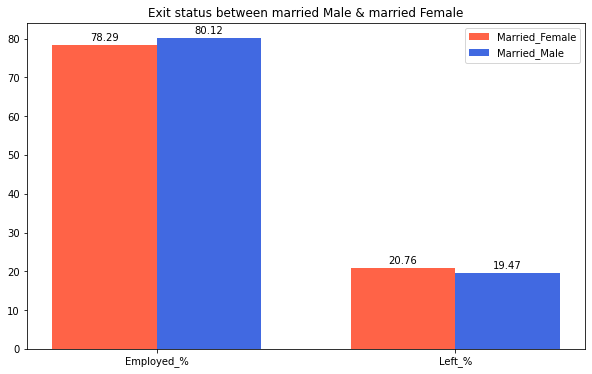

In [148]:
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ind = np.arange(len(married_exits.index))

rect1 = ax.bar(ind-width/2, married_exits['Female'], width, label='Married_Female', color='tomato')
rect2 = ax.bar(ind+width/2, married_exits['Male'], width, label='Married_Male', color='royalblue')


ax.legend()
ax.set_title('Exit status between married Male & married Female')
ax.set_xticks(ind)
ax.set_xticklabels(married_exits.index);

for x,y in zip(ind-width/2, married_exits['Female']):
    label = "{:.2f}".format(y)
    ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,5), ha='center')

for x,y in zip(ind+width/2, married_exits['Male']):
    label = "{:.2f}".format(y)
    ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,5), ha='center')


So from the above we can say, that a married Female or Male have the same chance of staying or quitting the company

#### Plot the graph for Unmarital exits

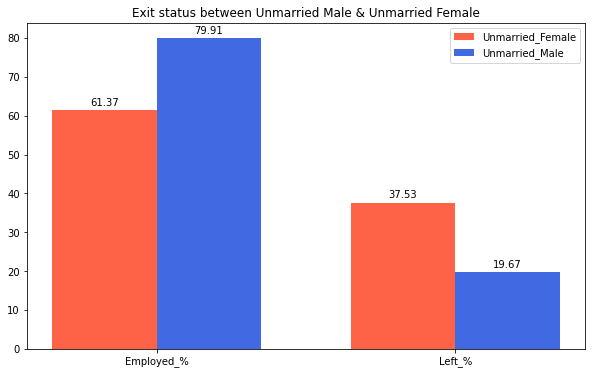

In [149]:
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ind = np.arange(len(unmarried_exits.index))

rect1 = ax.bar(ind-width/2, unmarried_exits['Female'], width, label='Unmarried_Female', color='tomato')
rect2 = ax.bar(ind+width/2, unmarried_exits['Male'], width, label='Unmarried_Male', color='royalblue')

ax.legend()
ax.set_title('Exit status between Unmarried Male & Unmarried Female')
ax.set_xticks(ind)
ax.set_xticklabels(unmarried_exits.index);

for x,y in zip(ind-width/2, unmarried_exits['Female']):
    label = "{:.2f}".format(y)
    ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,5), ha='center')

for x,y in zip(ind+width/2, unmarried_exits['Male']):
    label = "{:.2f}".format(y)
    ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,5), ha='center')


Here we see a larger difference in exit status of unmarried Female vs unmarried male.<br>
An unmarried Female has lesser chance of staying

In [150]:
dataset.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure',
       'employee_id', 'age', 'gender', 'marital_status', 'dept_id',
       'dept_name', 'dept_head'],
      dtype='object')

## Explore the continous columns

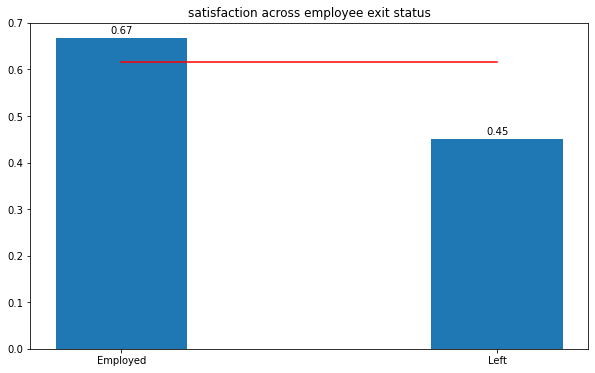

In [151]:
plot_stacked_bars_continous('satisfaction')

Employees with low satisfaction have tendency to leave the organization

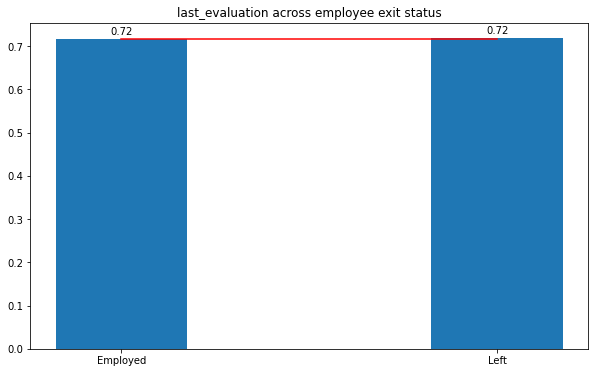

In [152]:
plot_stacked_bars_continous('last_evaluation')

This is an eye raiser. The company is losing quality people as the employees who have left have a high evaulation score of 0.73

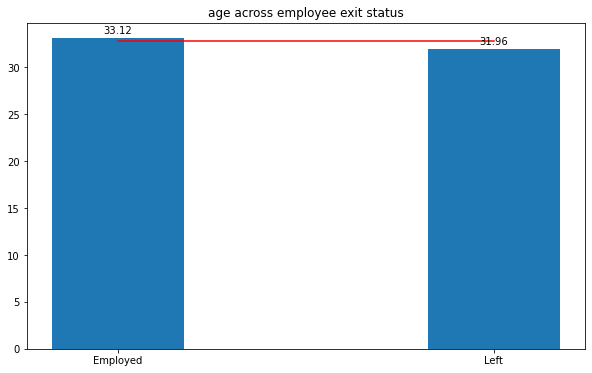

In [153]:
plot_stacked_bars_continous('age')

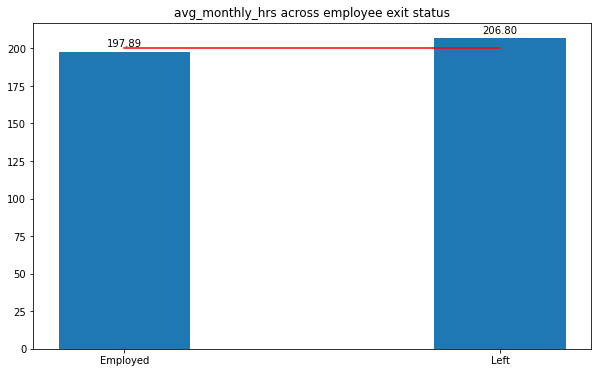

In [154]:
plot_stacked_bars_continous('avg_monthly_hrs')

People working more hrs are more likely to leave

### Conclusion from Exploratory Data Analysis

Satisfaction is one of the key attributes that can explain if an employee is likely to leave the organization. This we can conclude basis the feature importance output, where satisfaction ranked as the most important feature.
<br><br>
Average Monthly Hrs, Last Evaluation and n_projects are close and have a somewhat strong correlation with Satisfaction<br><br>
Other insights and comments:-
- Low salaried employees tend to leave more
- Highest attrition is seen among employees 4 to 6 years old in the company. Employees who have completed 5 years have the highest attrition
- Too many projects makes people leave the company. Too less project assignment also makes people leave company. 3 - 5 projects appears to be optimal
- People who have filed complaint, obviously have some dissatisfaction and are more likely to leave
- Female tend to leave the organization higher than males
- There appears to be higher attrition among unmarried employees. One other dimension we can check is, among the married & unmarried employees, how is the exit status by Female & Male. We want to check if marriage has a different impact on females and males
- Here the # of quits between Female and Male is almost comparable, but when we consider the base of total Females and Males, there is sharp contrast in quits. When we standardize it, we see that the unmarried female has a higher chance of quitting compared to their male counterpart
- A married Female or Male have the same chance of staying or quitting the company. But an unmarried Female has lesser chance of staying
- Another eye raiser point is that the company is losing quality people as the employees who have left have a high evaulation score of 0.73

## 6. Training the Algorithm <a class="anchor" id="section6"></a>

#### Model Evaluation Functions

In [155]:
def train_predict(train_data, train_classfiers, algorithm):
    model = algorithm
    model.fit(train_data, train_classfiers)
    train_prediction = model.predict(train_data)
    return train_prediction, model

def test_predict(train_data, algorithm):
    model = algorithm
    train_prediction = model.predict(train_data)
    return train_prediction

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score

def model_evaluation(actuals, predictions, algorithm):
    # Confusion matrix
    conf_matrix = pd.DataFrame(confusion_matrix(actuals, predictions))
    print("\n ",algorithm )
    print("CONFUSION MATRIX")
    print(conf_matrix)
    
    # Accuracy
    accuracy = round(accuracy_score(actuals, predictions),2)
    print('Accuracy: {}'.format(accuracy))
    
    # Precision score
    precision = round(metrics.precision_score(actuals, predictions, average='macro'),2)
    print('Precision : {}'.format(precision))
    
    # Recall score
    recall = round(metrics.recall_score(actuals, predictions, average='macro'),2)
    print('Recall : {}'.format(recall))
    
    f1 = round(metrics.fbeta_score(actuals, predictions, average='macro', beta=2),2)
    print('F1_score : {}'.format(f1))
    
    
    alg = algorithm
    df = pd.DataFrame(data=[{'Algorithm': alg, 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1_Score':f1}])
        
    return df[['Algorithm','Accuracy', 'Precision', 'Recall', 'F1_Score']]

In [157]:
results_train = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

#### Prepare the train data for prediction

In [158]:
train_data = details_employee_dept_data_train.drop(['dept_name','dept_head'], axis=1)
train_data.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id
0,145.0,0.0,0.692696,5,0.0,medium,0.941951,Employed,2.0,110274,36,Female,Married,D00-PD
1,241.0,0.0,0.798338,5,0.0,medium,0.713277,Employed,2.0,118256,51,Male,Married,D00-SS
2,190.0,0.0,0.791673,4,0.0,medium,0.647329,Employed,2.0,110750,22,Female,Unmarried,D00-SS
3,128.0,0.0,0.516555,2,0.0,low,0.432162,Left,3.0,125365,23,Female,Unmarried,D00-SS
4,191.0,0.0,0.744751,4,0.0,high,0.610375,Employed,3.0,117485,50,Male,Married,D00-IT


In [159]:
train_data['status'] = train_data['status'].map({'Left':1, 'Employed':0})

#### Separate the independent & dependent variables

In [160]:
X_train = train_data.loc[:, train_data.columns!='status']
y_train = train_data.loc[:, 'status']
print(X_train.shape)
print(y_train.shape)

(11302, 13)
(11302,)


In [161]:
X_train.dtypes

avg_monthly_hrs      float64
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
tenure               float64
employee_id            int64
age                    int64
gender                object
marital_status        object
dept_id               object
dtype: object

In [162]:
X_train_dummy = pd.get_dummies(X_train, columns=['salary', 'gender', 'marital_status','dept_id'], drop_first='True')
print(X_train_dummy.shape)

(11302, 23)


In [163]:
X_train_dummy.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age,salary_low,...,dept_id_D00-ENG,dept_id_D00-FN,dept_id_D00-IT,dept_id_D00-MN,dept_id_D00-MT,dept_id_D00-PD,dept_id_D00-PR,dept_id_D00-SP,dept_id_D00-SS,dept_id_D00-TP
0,145.0,0.0,0.692696,5,0.0,0.941951,2.0,110274,36,0,...,0,0,0,0,0,1,0,0,0,0
1,241.0,0.0,0.798338,5,0.0,0.713277,2.0,118256,51,0,...,0,0,0,0,0,0,0,0,1,0
2,190.0,0.0,0.791673,4,0.0,0.647329,2.0,110750,22,0,...,0,0,0,0,0,0,0,0,1,0
3,128.0,0.0,0.516555,2,0.0,0.432162,3.0,125365,23,1,...,0,0,0,0,0,0,0,0,1,0
4,191.0,0.0,0.744751,4,0.0,0.610375,3.0,117485,50,0,...,0,0,1,0,0,0,0,0,0,0


#### The Balancing Act

In [164]:
from imblearn.over_sampling import SMOTE

In [165]:
sm = SMOTE(sampling_strategy=1.0, random_state=0, k_neighbors=5)
X_train_dummy_balanced, y_train_balanced = sm.fit_sample(X_train_dummy, y_train)

In [166]:
print(X_train_dummy_balanced.shape)
print(y_train_balanced.shape)

(17246, 23)
(17246,)


In [167]:
print("Before balancing")
print(y_train.value_counts())
print("After balancing")
print(y_train_balanced.value_counts())

Before balancing
0    8623
1    2679
Name: status, dtype: int64
After balancing
1    8623
0    8623
Name: status, dtype: int64


#### Scale the dataset

In [168]:
# Use for Logistic Regression
std = StandardScaler()
std.fit(X_train_dummy_balanced)

with open('logreg_scaler.pickle', 'wb') as f:
    pickle.dump(std, f)

In [169]:
X_train_dummy_balanced_scaled = std.transform(X_train_dummy_balanced)

#### ML Algorithms

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#### Using Logistic Regression

In [171]:
X = X_train_dummy_balanced_scaled
y = y_train_balanced

logreg = LogisticRegression()
y_pred, logreg = train_predict(X, y, logreg)
results_logreg = model_evaluation(y, y_pred, 'Logistic Regression')

results_train = results_train.append(results_logreg, ignore_index=True)

with open('logreg.pickle', 'wb') as f:
    pickle.dump(logreg, f)


  Logistic Regression
CONFUSION MATRIX
      0     1
0  7575  1048
1  1670  6953
Accuracy: 0.84
Precision : 0.84
Recall : 0.84
F1_score : 0.84


#### Using Decision Trees

In [172]:
tree_param = [{'criterion':['gini', 'entropy'],
               'max_features':['sqrt','log2', None],
               'max_depth': np.arange(1,30,2),
               'min_samples_split': [10]
               }]

In [173]:
X = X_train_dummy_balanced
y = y_train_balanced

dtree_gscv = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree_gscv, tree_param, cv=10)

y_gscv_pred, dtree_gscv = train_predict(X, y, grid_search)

results_dtree_gscv = model_evaluation(y, y_gscv_pred, 'DTree GSCV')

results_train = results_train.append(results_dtree_gscv, ignore_index=True)

with open('dtree_gscv.pickle', 'wb') as f:
    pickle.dump(dtree_gscv, f)


  DTree GSCV
CONFUSION MATRIX
      0     1
0  8484   139
1   201  8422
Accuracy: 0.98
Precision : 0.98
Recall : 0.98
F1_score : 0.98


In [174]:
results_train

,Algorithm,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.84,0.84,0.84,0.84
1,DTree GSCV,0.98,0.98,0.98,0.98


## 7. Testing the Algorithm on the test dataset<a class="anchor" id="section7"></a>

In [175]:
# Had split the employee_data in the very begining. Now we need to pre-process it before predicting
with open('test_data.pickle', 'rb') as f:
    employee_data_test = pickle.load(f)

print("Test dataset size: ",employee_data_test.shape)

Test dataset size:  (2830, 11)


In [176]:
employee_data_test.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
7006,188.0,D00-SS,NaN,0.673354,3,NaN,low,0.538767,Employed,2.0,109287
13319,278.0,D00-SS,1.0,0.403510,2,NaN,low,0.467842,Employed,3.0,115496
13692,136.0,D00-SS,1.0,0.513453,3,NaN,medium,0.305257,Employed,2.0,100313
4896,244.0,D00-SP,NaN,0.758612,4,NaN,low,0.636945,Employed,2.0,111069
11817,219.0,D00-ENG,NaN,0.950250,3,NaN,low,0.534223,Left,6.0,117026


In [177]:
employee_data_test.isnull().sum()

avg_monthly_hrs         0
department            150
filed_complaint      2442
last_evaluation       292
n_projects              0
recently_promoted    2780
salary                  0
satisfaction           34
status                  0
tenure                 34
employee_id             0
dtype: int64

#### Fix the duplicate values in the test dataset

In [178]:
employee_data_test = employee_data_test.drop_duplicates(keep='first')
print("Test dataset size: ",employee_data_test.shape)

Test dataset size:  (2827, 11)


##### Check for rows with 0 as employee id

In [179]:
employee_data_test[employee_data_test['employee_id']==0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
11304,167.0,NaN,NaN,0.880053,5,NaN,low,0.682140,Employed,3.0,0
1234,129.0,D00-SP,NaN,0.402660,2,NaN,medium,0.437359,Left,3.0,0


In [180]:
# if '0' employee id found
zero_index = employee_data_test[employee_data_test['employee_id']==0].index
employee_data_test = employee_data_test.drop(index=zero_index)

##### Correct the '-IT' department name

In [181]:
dept_index = employee_data_test[employee_data_test['department']=='-IT'].index
employee_data_test.loc[dept_index,'department']='D00-IT'

In [182]:
employee_data_test['department'].value_counts()

D00-SS     765
D00-ENG    521
D00-SP     418
D00-IT     282
D00-MT     170
D00-FN     155
D00-PD     144
D00-MN     115
D00-PR      44
D00-TP      34
D00-AD      28
Name: department, dtype: int64

##### Check for null values

In [183]:
employee_data_test.isnull().sum()

avg_monthly_hrs         0
department            149
filed_complaint      2438
last_evaluation       292
n_projects              0
recently_promoted    2775
salary                  0
satisfaction           34
status                  0
tenure                 34
employee_id             0
dtype: int64

#### Fill up missing not at random values

In [184]:
# Filed complaint fill with 0
null_index = employee_data_test[employee_data_test['filed_complaint'].isnull()].index
employee_data_test.loc[null_index, 'filed_complaint'] = 0

# Recently promoted with 0
null_index = employee_data_test[employee_data_test['recently_promoted'].isnull()].index
employee_data_test.loc[null_index, 'recently_promoted'] = 0

# Doing same for tenure & satisfaction
employee_data_test['tenure'].fillna(value=1, inplace=True)
employee_data_test['satisfaction'].fillna(value=0.0, inplace=True)

In [185]:
employee_data_test.isnull().sum()

avg_monthly_hrs        0
department           149
filed_complaint        0
last_evaluation      292
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
employee_id            0
dtype: int64

##### Fixing the last evaluation column

In [186]:
# Store in a temp dataframe
last_eval_dataset_test = employee_data_test.drop(['employee_id', 'department', 'status'], axis=1)

# Dummify the cat columns
last_eval_dataset_dummy_test = pd.get_dummies(last_eval_dataset_test, columns=['salary'], drop_first=True)

In [187]:
# Prepare the independent variable list for prediction
null_index = last_eval_dataset_dummy_test[last_eval_dataset_dummy_test['last_evaluation'].isnull()].index
X = last_eval_dataset_dummy_test.loc[null_index, last_eval_dataset_dummy_test.columns!='last_evaluation']
print(X.shape)

(292, 8)


In [188]:
# Get the last_eval object trained for prediction
with open('last_eval.pickle', 'rb') as f:
    last_eval_obj = pickle.load(f)

y = last_eval_obj.predict(X)

In [189]:
y

array([0.483, 0.712, 0.624, 0.64 , 0.471, 0.476, 0.528, 0.609, 0.532,
       0.949, 0.718, 0.982, 0.949, 0.513, 0.564, 0.791, 0.759, 0.847,
       0.796, 0.602, 0.756, 0.949, 0.755, 0.521, 0.668, 0.796, 0.667,
       0.645, 0.822, 0.949, 0.547, 0.435, 0.448, 0.949, 0.425, 0.528,
       0.56 , 0.94 , 0.702, 0.62 , 0.534, 0.531, 0.737, 0.757, 0.682,
       0.832, 0.624, 0.949, 0.949, 0.507, 0.933, 0.523, 0.524, 0.861,
       0.658, 0.499, 0.497, 0.457, 0.711, 0.51 , 0.949, 0.633, 0.51 ,
       0.847, 0.647, 0.53 , 0.885, 0.72 , 0.788, 0.534, 0.499, 0.675,
       0.452, 0.684, 0.949, 0.518, 0.967, 0.792, 0.49 , 0.58 , 0.512,
       0.603, 0.615, 0.447, 0.724, 0.994, 0.593, 0.65 , 0.727, 0.949,
       0.668, 0.53 , 0.466, 0.46 , 0.707, 0.504, 0.462, 0.778, 0.731,
       0.882, 0.798, 0.608, 0.58 , 0.692, 0.918, 0.606, 0.64 , 0.949,
       0.637, 0.949, 0.712, 0.588, 0.521, 0.759, 0.523, 0.434, 0.608,
       0.827, 0.469, 0.949, 0.809, 0.968, 0.949, 0.949, 0.86 , 0.556,
       0.786, 0.949,

In [190]:
# Copy the predicited values into employee_data_test dataset
employee_data_test.loc[null_index, 'last_evaluation'] = y

In [191]:
#sns.distplot(employee_data_test['last_evaluation'])

##### Fixing the department column

In [192]:
dept_data_test = employee_data_test.drop(['employee_id','status'], axis=1)

In [193]:
# Dummify the data
dept_data_dummy_test = pd.get_dummies(dept_data_test, columns=['salary'], drop_first=True)

# Retrive the independent variable
null_index = dept_data_dummy_test[dept_data_dummy_test['department'].isnull()].index
X = dept_data_dummy_test.loc[null_index, dept_data_dummy_test.columns!='department']
print(X.shape)

(149, 9)


In [194]:
# Get the obj trained for department null values prediction
with open('dept_pred.pickle', 'rb') as f:
    dept_obj = pickle.load(f)
    
y = dept_obj.predict(X)

# Get the label encoder for inverse transformtion of department labels
with open('label_encoder.pickle', 'rb') as f:
    le = pickle.load(f)

y_labels = le.inverse_transform(y)

In [195]:
employee_data_test.loc[null_index, 'department'] = y_labels

In [196]:
employee_data_test['department'].value_counts()

D00-SS     811
D00-ENG    548
D00-SP     432
D00-IT     300
D00-MT     181
D00-FN     163
D00-PD     157
D00-MN     121
D00-PR      46
D00-TP      34
D00-AD      32
Name: department, dtype: int64

##### Final check for all null values

In [197]:
employee_data_test.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
dtype: int64

In [198]:
print("Employee data size", employee_data_test.shape)

Employee data size (2825, 11)


# Merge the test dataset

In [199]:
details_employee_data_test = employee_data_test.merge(employee_details_data, how='left', on='employee_id')
details_employee_dept_data_test = details_employee_data_test.merge(department_data, how='left',
                                                                     left_on='department', right_on='dept_id')

In [200]:
details_employee_dept_data_test.drop('department', axis=1, inplace=True)
details_employee_dept_data_test.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,188.0,0.0,0.673354,3,0.0,low,0.538767,Employed,2.0,109287,22,Female,Unmarried,D00-SS,Sales,Edward J Bayley
1,278.0,1.0,0.403510,2,0.0,low,0.467842,Employed,3.0,115496,25,Female,Unmarried,D00-SS,Sales,Edward J Bayley
2,136.0,1.0,0.513453,3,0.0,medium,0.305257,Employed,2.0,100313,25,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,244.0,0.0,0.758612,4,0.0,low,0.636945,Employed,2.0,111069,27,Male,Unmarried,D00-SP,Support,Amelia Westray
4,219.0,0.0,0.950250,3,0.0,low,0.534223,Left,6.0,117026,24,Male,Unmarried,D00-ENG,Engineering,Sushant Raghunathan K


##### Check for nulls and duplicates

In [201]:
details_employee_dept_data_test.isnull().sum()

avg_monthly_hrs      0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
age                  0
gender               0
marital_status       0
dept_id              0
dept_name            0
dept_head            0
dtype: int64

In [202]:
details_employee_dept_data_test['employee_id'].value_counts().sum()

2825

#### Prepare the test dataset for prediction

In [203]:
test_data = details_employee_dept_data_test.drop(['dept_name','dept_head'], axis=1)
test_data.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id
0,188.0,0.0,0.673354,3,0.0,low,0.538767,Employed,2.0,109287,22,Female,Unmarried,D00-SS
1,278.0,1.0,0.403510,2,0.0,low,0.467842,Employed,3.0,115496,25,Female,Unmarried,D00-SS
2,136.0,1.0,0.513453,3,0.0,medium,0.305257,Employed,2.0,100313,25,Female,Unmarried,D00-SS
3,244.0,0.0,0.758612,4,0.0,low,0.636945,Employed,2.0,111069,27,Male,Unmarried,D00-SP
4,219.0,0.0,0.950250,3,0.0,low,0.534223,Left,6.0,117026,24,Male,Unmarried,D00-ENG


In [204]:
test_data['status'] = test_data['status'].map({'Left':1, 'Employed':0})

In [205]:
X_test = test_data.loc[:, test_data.columns!='status']
y_test = test_data.loc[:, 'status']
print(X_test.shape)
print(y_test.shape)

(2825, 13)
(2825,)


In [206]:
X_test_dummy = pd.get_dummies(X_test, columns=['salary', 'gender', 'marital_status','dept_id'], drop_first='True')
print(X_test_dummy.shape)

(2825, 23)


### Use the trained objects to predict the employee status

In [207]:
results_test = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

##### Logistic Regression

In [208]:
# Scale the test dataset

with open('logreg_scaler.pickle', 'rb') as f:
    std = pickle.load(f)

X_test_dummy_scaled = std.transform(X_test_dummy)

# Logreg object
with open('logreg.pickle', 'rb') as f:
    logreg = pickle.load(f)

In [209]:
X = X_test_dummy_scaled
y = y_test

y_pred = test_predict(X, logreg)
results_logreg = model_evaluation(y, y_pred, 'Logistic Regression')

results_test = results_test.append(results_logreg, ignore_index=True)


  Logistic Regression
CONFUSION MATRIX
      0    1
0  1897  247
1   326  355
Accuracy: 0.8
Precision : 0.72
Recall : 0.7
F1_score : 0.71


#### Using Decision Tree

In [210]:
# Dtree Object

with open('dtree_gscv.pickle', 'rb') as f:
    dtree_gscv = pickle.load(f)

In [211]:
X = X_test_dummy
y = y_test

y_pred = test_predict(X, dtree_gscv)
results_dtree_gscv = model_evaluation(y, y_pred, 'Decision Tree')

results_test = results_test.append(results_dtree_gscv, ignore_index=True)


  Decision Tree
CONFUSION MATRIX
      0    1
0  2082   62
1    50  631
Accuracy: 0.96
Precision : 0.94
Recall : 0.95
F1_score : 0.95


In [212]:
results_test

,Algorithm,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.80,0.72,0.70,0.71
1,Decision Tree,0.96,0.94,0.95,0.95


## 8. Executing the algorithm on the Unseen dataset and predicting the employee status<a class="anchor" id="section8"></a>

In [213]:
unseen_data = pd.read_csv('Unseen_data.csv')
unseen_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


### Preprocess the Unseen data

In [214]:
unseen_data.isnull().sum()

avg_monthly_hrs       0
department            2
filed_complaint      85
last_evaluation      17
n_projects            0
recently_promoted    97
salary                0
satisfaction          3
tenure                3
employee_id           0
dtype: int64

#### Sort out the null values in unseen data

In [215]:
# Filed complaint fill with 0
null_index = unseen_data[unseen_data['filed_complaint'].isnull()].index
unseen_data.loc[null_index, 'filed_complaint'] = 0

# Recently promoted with 0
null_index = unseen_data[unseen_data['recently_promoted'].isnull()].index
unseen_data.loc[null_index, 'recently_promoted'] = 0

# Doing same for tenure & satisfaction
unseen_data['tenure'].fillna(value=1, inplace=True)
unseen_data['satisfaction'].fillna(value=0.0, inplace=True)

# convert -IT in dept column to D00-IT
dept_index = unseen_data[unseen_data['department']=='-IT'].index
unseen_data.loc[dept_index,'department']='D00-IT'

In [216]:
unseen_data.isnull().sum()

avg_monthly_hrs       0
department            2
filed_complaint       0
last_evaluation      17
n_projects            0
recently_promoted     0
salary                0
satisfaction          0
tenure                0
employee_id           0
dtype: int64

#### Fix up the last evaluation dataset

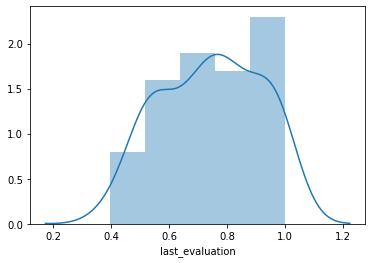

In [217]:
sns.distplot(unseen_data['last_evaluation'])

In [218]:
# Store in a temp dataframe
unseen_data_temp = unseen_data.drop(['employee_id', 'department'], axis=1)

# Dummify the cat columns
unseen_data_temp_dummy = pd.get_dummies(unseen_data_temp, columns=['salary'], drop_first=True)

In [219]:
# Prepare the independent variable list for prediction
null_index = unseen_data_temp_dummy[unseen_data_temp_dummy['last_evaluation'].isnull()].index
X = unseen_data_temp_dummy.loc[null_index, unseen_data_temp_dummy.columns!='last_evaluation']
print(X.shape)

(17, 8)


In [220]:
# Get the last_eval object trained for prediction
with open('last_eval.pickle', 'rb') as f:
    last_eval_obj = pickle.load(f)

y = last_eval_obj.predict(X)
y

array([0.702, 0.7  , 0.745, 0.949, 0.564, 0.573, 0.775, 0.86 , 0.925,
       0.911, 0.949, 0.54 , 0.517, 0.597, 0.644, 0.64 , 0.949])

In [221]:
unseen_data.loc[null_index, 'last_evaluation'] = y

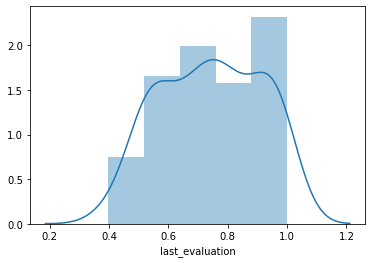

In [222]:
sns.distplot(unseen_data['last_evaluation'])

##### Fixing the department column

In [223]:
unseen_data_temp = unseen_data.drop(['employee_id'], axis=1)

In [224]:
# Dummify the data
unseen_data_temp_dummy = pd.get_dummies(unseen_data_temp, columns=['salary'], drop_first=True)

# Retrive the independent variable
null_index = unseen_data_temp_dummy[unseen_data_temp_dummy['department'].isnull()].index
X = unseen_data_temp_dummy.loc[null_index, unseen_data_temp_dummy.columns!='department']
print(X.shape)

(2, 9)


In [225]:
# Get the obj trained for department null values prediction
with open('dept_pred.pickle', 'rb') as f:
    dept_obj = pickle.load(f)
    
y = dept_obj.predict(X)

# Get the label encoder for inverse transformtion of department labels
with open('label_encoder.pickle', 'rb') as f:
    le = pickle.load(f)

y_labels = le.inverse_transform(y)

In [226]:
unseen_data.loc[null_index, 'department'] = y_labels

In [227]:
# Final Check for null values
unseen_data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
employee_id          0
dtype: int64

In [228]:
print("Unseen data size: ", unseen_data.shape)

Unseen data size:  (100, 10)


### Merge the Unseen dataset

In [229]:
details_unseen_data = unseen_data.merge(employee_details_data, how='left', on='employee_id')
unseen_data_merged = details_unseen_data.merge(department_data, how='left', left_on='department', right_on='dept_id')

In [230]:
unseen_data_merged.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
employee_id          0
age                  0
gender               0
marital_status       0
dept_id              0
dept_name            0
dept_head            0
dtype: int64

In [231]:
unseen_data_merged.drop('department', axis=1, inplace=True)
unseen_data_merged.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,134,0.0,0.528841,2,0.0,low,0.400464,3.0,119045,27,Male,Unmarried,D00-IT,IT,Henry Adey
1,221,0.0,0.784561,2,0.0,low,0.759513,3.0,112223,23,Male,Unmarried,D00-PD,Product,Darcy Staines
2,156,0.0,0.545183,2,0.0,medium,0.336457,3.0,103924,26,Male,Unmarried,D00-SS,Sales,Edward J Bayley
3,133,0.0,0.701798,4,0.0,medium,0.832039,2.0,105922,52,Male,Married,D00-PR,Procurement,Louie Viles
4,135,0.0,0.454637,2,0.0,low,0.320723,5.0,103297,27,Male,Unmarried,D00-SS,Sales,Edward J Bayley


#### Prepare the unseen data for prediction

In [232]:
X_unseen = unseen_data_merged.drop(['dept_name','dept_head'], axis=1)
X_unseen.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status,dept_id
0,134,0.0,0.528841,2,0.0,low,0.400464,3.0,119045,27,Male,Unmarried,D00-IT
1,221,0.0,0.784561,2,0.0,low,0.759513,3.0,112223,23,Male,Unmarried,D00-PD
2,156,0.0,0.545183,2,0.0,medium,0.336457,3.0,103924,26,Male,Unmarried,D00-SS
3,133,0.0,0.701798,4,0.0,medium,0.832039,2.0,105922,52,Male,Married,D00-PR
4,135,0.0,0.454637,2,0.0,low,0.320723,5.0,103297,27,Male,Unmarried,D00-SS


In [233]:
# Dummify the categorical variables
X_unseen_dummy = pd.get_dummies(X_unseen, columns=['salary', 'gender', 'marital_status','dept_id'], drop_first='True')
print(X_unseen_dummy.shape)

(100, 23)


In [234]:
X_unseen_dummy.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age,salary_low,...,dept_id_D00-ENG,dept_id_D00-FN,dept_id_D00-IT,dept_id_D00-MN,dept_id_D00-MT,dept_id_D00-PD,dept_id_D00-PR,dept_id_D00-SP,dept_id_D00-SS,dept_id_D00-TP
0,134,0.0,0.528841,2,0.0,0.400464,3.0,119045,27,1,...,0,0,1,0,0,0,0,0,0,0
1,221,0.0,0.784561,2,0.0,0.759513,3.0,112223,23,1,...,0,0,0,0,0,1,0,0,0,0
2,156,0.0,0.545183,2,0.0,0.336457,3.0,103924,26,0,...,0,0,0,0,0,0,0,0,1,0
3,133,0.0,0.701798,4,0.0,0.832039,2.0,105922,52,0,...,0,0,0,0,0,0,1,0,0,0
4,135,0.0,0.454637,2,0.0,0.320723,5.0,103297,27,1,...,0,0,0,0,0,0,0,0,1,0


#### Use the trained objects to predict for the Unseen dataset

In [235]:
# Scale the test dataset

with open('logreg_scaler.pickle', 'rb') as f:
    std = pickle.load(f)

X_unseen_dummy_scaled = std.transform(X_unseen_dummy)

# Logreg object
with open('logreg.pickle', 'rb') as f:
    logreg = pickle.load(f)
    
# Decision Tree
with open('dtree_gscv.pickle', 'rb') as f:
    dtree_gscv = pickle.load(f)

#### Logistic Regression

In [236]:
X = X_unseen_dummy_scaled

y_logreg_pred = test_predict(X, logreg)

y_logreg_pred_proba = logreg.predict_proba(X)

In [237]:
y_logreg_pred.sum()

18

In [250]:
y_logreg_pred_proba[:,1]

array([0.496, 0.25 , 0.363, 0.005, 0.643, 0.069, 0.35 , 0.08 , 0.209,
       0.09 , 0.317, 0.714, 0.539, 0.062, 0.032, 0.007, 0.532, 0.808,
       0.052, 0.183, 0.213, 0.498, 0.043, 0.037, 0.129, 0.064, 0.389,
       0.031, 0.63 , 0.595, 0.267, 0.106, 0.061, 0.006, 0.152, 0.082,
       0.166, 0.721, 0.212, 0.153, 0.305, 0.402, 0.486, 0.441, 0.079,
       0.195, 0.613, 0.04 , 0.24 , 0.422, 0.025, 0.134, 0.29 , 0.04 ,
       0.338, 0.057, 0.091, 0.043, 0.097, 0.614, 0.034, 0.045, 0.265,
       0.075, 0.746, 0.356, 0.017, 0.786, 0.104, 0.121, 0.191, 0.024,
       0.07 , 0.121, 0.557, 0.65 , 0.393, 0.029, 0.667, 0.131, 0.681,
       0.432, 0.41 , 0.123, 0.111, 0.525, 0.022, 0.276, 0.256, 0.146,
       0.483, 0.682, 0.211, 0.45 , 0.017, 0.341, 0.052, 0.012, 0.418,
       0.332])

#### Decision Tree

In [242]:
X = X_unseen_dummy

y_dtree_pred = test_predict(X, dtree_gscv)

y_dtree_pred_proba = dtree_gscv.predict_proba(X)

In [243]:
y_dtree_pred.sum()

29

In [244]:
y_dtree_pred_proba[:,1]

array([0.998, 0.205, 0.998, 0.003, 0.   , 0.005, 0.129, 0.   , 0.045,
       0.   , 0.   , 0.993, 0.998, 0.005, 0.045, 0.003, 0.998, 0.   ,
       0.   , 0.   , 0.986, 0.998, 0.   , 0.   , 0.998, 0.   , 0.   ,
       0.003, 1.   , 0.   , 0.   , 0.005, 0.   , 0.005, 0.   , 0.005,
       0.   , 1.   , 0.045, 0.019, 1.   , 1.   , 0.   , 0.05 , 0.   ,
       0.019, 0.998, 0.   , 0.   , 0.019, 0.   , 0.   , 0.   , 0.005,
       0.016, 0.   , 0.005, 0.005, 0.   , 1.   , 0.   , 0.998, 0.998,
       0.   , 1.   , 0.993, 0.005, 0.993, 0.038, 0.971, 0.045, 0.005,
       0.003, 0.263, 0.998, 0.833, 0.045, 0.005, 0.045, 0.019, 1.   ,
       0.998, 0.016, 0.971, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.881, 0.998, 0.2  , 0.971, 0.769, 0.005, 0.   , 0.   , 0.045,
       0.   ])

## 8. Results & Conclusion<a class="anchor" id="section8"></a>

In [245]:
print("Training results")
results_train

Training results


,Algorithm,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.84,0.84,0.84,0.84
1,DTree GSCV,0.98,0.98,0.98,0.98


In [246]:
print("Testing results")
results_test

Testing results


,Algorithm,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.80,0.72,0.70,0.71
1,Decision Tree,0.96,0.94,0.95,0.95


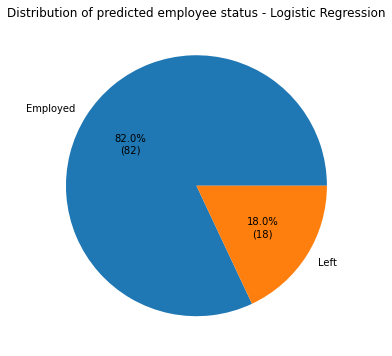

In [247]:
exit_status = pd.Series(y_logreg_pred).value_counts()
plt.figure(figsize=(10,6))
plt.pie(exit_status,
        labels=['Employed', 'Left'],
        autopct=lambda pct: func(pct, exit_status));
plt.title('Distribution of predicted employee status - Logistic Regression');

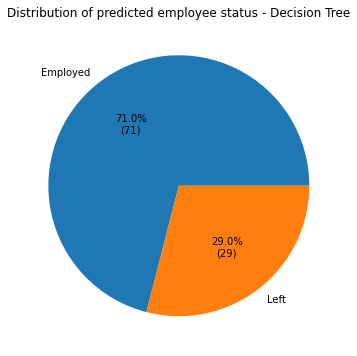

In [248]:
exit_status = pd.Series(y_dtree_pred).value_counts()
plt.figure(figsize=(10,6))
plt.pie(exit_status,
        labels=['Employed', 'Left'],
        autopct=lambda pct: func(pct, exit_status));
plt.title('Distribution of predicted employee status - Decision Tree');